# <font color='orange'>**Contexto**:
<font color='orange'> WhiteHosting, es una empresa británica que se dedica a la inversión en inmuebles vacacionales; experto en el mercado de inmobiliario español.

- <font color='orange'>Era: post pandemia
- Projecto: quiere invertir 300 millones de euros en alojamientos de Madrid, Barcelona y Valencia



<font color='orange'>*/BlackWidow es uno de los mayores fondos de occidente./*

## <font color='orange'>*Expectativas del analisis*:
- <font color='orange'>Comprender mejor el mercado y las distintas oportunidades de compra
- Un archivo ejecutable que se incluye: Jupyter Notebook o Google Colab; respuestas a las preguntas; el código SQL; un esquema relacional; todo el código de Python.

## <font color='orange'> Preguntas de negocio a resolver
1.   <font color='orange'> ¿Cuantos inmuebles únicos hay en el dataset vs airbnb?
2.   ¿Cual es la diferencia en número de inmueble posteados entre los 2 datasets?
3.   ¿Cuáles son los parámetros que forman el precio?
4.   ¿Son iguales los parámetros en ambas fuentes de datos?
5.   ¿Has podido ver algún inmueble que está en ambas fuentes de datos?, ¿Es su valoración la misma?
6.   ¿En qué fuentes de datos hay más volatilidad en cuanto al precio?, ¿Hay algún tipo de estacionalidad?
7.   Crea un dataset único de verdad (unifica los 2 dataframes).
8.   ¿Hay alguna variable que podríamos añadir para mejorar el analísis?
9.   ¿Puedes hacer un ranking de los inmuebles más caros?
10.   ¿Cuáles son los inmuebles más rentables?
11.   ¿Teniendo en cuenta todo el conocimiento adquirido, cuales son tus sugerencias a la hora de invertir 300 millones de euros?



# **<font color='orange'> I. Limpieza de datos**
<font color='orange'> Pandas, Numpy; funciones avanzadas de Python

*Archivo separado de Limpieza de datos de "Alojamientos - WhiteHosting" y de "AirBnb"*

# **<font color='orange'> II. Análisis exploratorio:** White Hosting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
df = pd.read_csv("C:\\Users\\Usuario\\OneDrive\\Documentos\\GitHub\\WhiteHosting\\CSVs\\WhiteHosting\\White Hosting estructurado.csv")

In [16]:
df.head(2)

,ID,host_id,name,description,price,has_availability,room_type,accommodates,bathrooms,beds,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,country,city,latitude,longitude,insert_date,amenities_list
0,36187629,261787331,Piso reformado excelente ubicacion,Apartamento reformado hace dos meses en el Cab...,90.0,True,Alojamiento entero,4,2,3,...,10.0,10.0,10.0,10.0,Spain,Valencia,3.947.149,-3.346,2019-12-31,"{TV,Wifi,""Air conditioning"",Kitchen,""Smoking a..."
1,5388904,20843074,Nice Room in a Penthouse,The apartment is fully equipped. Large bathroo...,100.0,True,Habitación privada,1,1,1,...,8.0,10.0,10.0,10.0,Spain,Barcelona,4.138.353,215.388,2021-01-12,"[""Wifi"", ""Kitchen"", ""Heating"", ""TV"", ""Essentia..."


In [17]:
df.shape

(10716, 26)

In [18]:
ids_unicos = df['ID'].unique()
print(len(ids_unicos))

9650


In [19]:
#Eliminamos Id´s duplicados con sus respectivos filas
df.drop_duplicates(subset='ID', keep='first', inplace=True)
print(df.shape)

(9650, 26)


In [20]:
df.dtypes

ID                               int64
host_id                          int64
name                            object
description                     object
price                          float64
has_availability                object
room_type                       object
accommodates                     int64
bathrooms                        int64
beds                             int64
minimum_nights                   int64
maximum_nights                 float64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
country                         object
city                            object
latitude                        object
longitude                       object
insert_date                     object
amenities_list           

In [21]:
#volvemos a cambiar los tipos de las columnas "price" & "maximum_night" cuales han sido afectados al cargar el csv

#Cambar a int la columna maximum_nights
def convertir_a_entero1(valor):
    if pd.isna(valor):
        return valor
    else:
        return int(float(valor))

#Aplicar la función
df['maximum_nights'] = df['maximum_nights'].apply(convertir_a_entero1).astype('Int64')

#Cambiamos la columna "price" a integer
def convertir_a_entero2(valor):
    if pd.isna(valor):
        return valor
    else:
        return int(float(valor))

#Aplicar la función
df['price'] = df['price'].apply(convertir_a_entero2).astype('Int64')

#Cambiamos la columna "ID" y "host_id" a object
df['ID'] = df['ID'].astype('object')
df['host_id'] = df['host_id'].astype('object')


In [22]:
#Compobamos si ha funcionado OK
#df.dtypes

In [23]:
#Cambiamos el formato de valoracion en formato 0-5
#Columnas de valoración que deseamos convertir
columns_to_convert = ['review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']

#Convertir los valores de 0-10 a 0-5
df[columns_to_convert] = df[columns_to_convert] / 2

df['review_scores_rating'] = (df['review_scores_rating'] / 2)*0.1

In [24]:
#Cambiamos la columna 'review_scores_rating', cual tenía numeros de 0-100
df['review_scores_rating'] = df['review_scores_rating'] 

In [25]:
df.columns

Index(['ID', 'host_id', 'name', 'description', 'price', 'has_availability',
       'room_type', 'accommodates', 'bathrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'country', 'city',
       'latitude', 'longitude', 'insert_date', 'amenities_list'],
      dtype='object')

In [27]:
#Cambiamos los nombres a español
#Diccionario de traducción de nombres de columnas
traduccion_columnas = {
    'ID': 'ID',
    'host_id': 'ID_anfitrion',
    'name': 'Nombre del título',
    'description': 'Descripción',
    'price': 'Precio',
    'has_availability': 'Disponibilidad',
    'room_type': 'Tipo de habitación',
    'accommodates': 'Viajeros máximos',
    'bathrooms': 'Baños',
    'beds': 'Camas',
    'minimum_nights': 'Noches_minimas',
    'maximum_nights': 'Noches_maximas',
    'number_of_reviews': 'Numero valoraciones',
    'review_scores_rating': 'Valoración total',
    'review_scores_accuracy': 'Valoración precisión',
    'review_scores_cleanliness': 'Valoración limpieza',
    'review_scores_checkin': 'Valoración checkin',
    'review_scores_communication': 'Valoración comunicación',
    'review_scores_location': 'Valoración ubicación',
    'review_scores_value': 'Valoración valor',
    'country': 'Pais',
    'city': 'Ciudad',
    'latitude': 'Latitud',
    'longitude': 'Longitud',
    'insert_date': 'Fecha_inserción',
    'amenities_list': 'Lista_amenidades'
}

#Renombrar las columnas del DataFrame
df = df.rename(columns=traduccion_columnas)

#Mostrar los nuevos nombres de las columnas para verificar
print("Nuevos nombres de las columnas:")
print(df.columns)

Nuevos nombres de las columnas:
Index(['ID', 'ID_anfitrion', 'Nombre del título', 'Descripción', 'Precio',
       'Disponibilidad', 'Tipo de habitación', 'Viajeros máximos', 'Baños',
       'Camas', 'Noches_minimas', 'Noches_maximas', 'Numero valoraciones',
       'Valoración total', 'Valoración precisión', 'Valoración limpieza',
       'Valoración checkin', 'Valoración comunicación', 'Valoración ubicación',
       'Valoración valor', 'Pais', 'Ciudad', 'Latitud', 'Longitud',
       'Fecha_inserción', 'Lista_amenidades'],
      dtype='object')


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9650 entries, 0 to 10715
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       9650 non-null   object 
 1   ID_anfitrion             9650 non-null   object 
 2   Nombre del título        9642 non-null   object 
 3   Descripción              9515 non-null   object 
 4   Precio                   9411 non-null   Int64  
 5   Disponibilidad           9110 non-null   object 
 6   Tipo de habitación       9649 non-null   object 
 7   Viajeros máximos         9650 non-null   int64  
 8   Baños                    9650 non-null   int64  
 9   Camas                    9650 non-null   int64  
 10  Noches_minimas           9650 non-null   int64  
 11  Noches_maximas           9649 non-null   Int64  
 12  Numero valoracines       9650 non-null   int64  
 13  Valoración total         7016 non-null   float64
 14  Valoración precisión     700

In [28]:
print(f'------- Nulos por columna:\n{df.isna().sum()}')
print(f'------- Nulos totales:\n{df.isna().sum().sum()}')

------- Nulos por columna:
ID                            0
ID_anfitrion                  0
Nombre del título             8
Descripción                 135
Precio                      239
Disponibilidad              540
Tipo de habitación            1
Viajeros máximos              0
Baños                         0
Camas                         0
Noches_minimas                0
Noches_maximas                1
Numero valoraciones           0
Valoración total           2634
Valoración precisión       2643
Valoración limpieza        2637
Valoración checkin         2648
Valoración comunicación    2639
Valoración ubicación       2649
Valoración valor           2649
Pais                          0
Ciudad                        5
Latitud                       0
Longitud                      0
Fecha_inserción               0
Lista_amenidades              1
dtype: int64
------- Nulos totales:
19429


In [29]:
f"Porcentaje de nulos sobre columna Valoración total : {round(2634/9650  * 100, 1)}%"
#Similar en cada columna de las valoraciones

'Porcentaje de nulos sobre columna Valoración total : 27.3%'

In [30]:
f"Porcentaje de nulos sobre columna Disponibilidad : {round(540/9650  * 100, 1)}%"

'Porcentaje de nulos sobre columna Disponibilidad : 5.6%'

## <font color='orange'> Análisis preliminar - datos númericos

In [31]:
df.describe()

,Precio,Viajeros máximos,Baños,Camas,Noches_minimas,Noches_maximas,Numero valoraciones,Valoración total,Valoración precisión,Valoración limpieza,Valoración checkin,Valoración comunicación,Valoración ubicación,Valoración valor
count,9411.0,9650.000000,9650.000000,9650.000000,9650.000000,9649.0,9650.000000,7016.000000,7007.000000,7013.000000,7002.000000,7011.000000,7001.000000,7001.000000
mean,101.106365,4.266218,1.581969,2.969119,4.968705,758.284278,25.813472,4.594719,4.724347,4.655497,4.811054,4.810227,4.771104,4.567847
std,86.052357,2.589132,0.995776,4.842710,17.986454,498.91754,52.315986,0.465166,0.475615,0.506332,0.416508,0.417649,0.384976,0.500539
min,6.0,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45.0,2.000000,1.000000,1.000000,1.000000,60.0,0.000000,4.450000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000
50%,75.0,4.000000,1.000000,2.000000,2.000000,1125.0,5.000000,4.700000,5.000000,5.000000,5.000000,5.000000,5.000000,4.500000
75%,124.0,6.000000,2.000000,4.000000,4.000000,1125.0,27.000000,4.900000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,500.0,29.000000,13.000000,300.000000,1125.000000,1125.0,588.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [32]:
#Buscamos el índice de la fila con el valor máximo(300) en la columna 'Camas',, porque sospechamos que este dato es incorrecto
indice_max_camas = df['Camas'].idxmax()

#Mostrar la fila correspondiente al valor máximo
fila_max_camas = df.loc[indice_max_camas]
print(fila_max_camas)

ID                                                                  21616423
ID_anfitrion                                                       157248245
Nombre del título               Villa de lujo con acceso privado a la playa.
Descripción                Bonita Villa para 9 personas en una tranquila ...
Precio                                                                   150
Disponibilidad                                                          True
Tipo de habitación                                        Alojamiento entero
Viajeros máximos                                                          10
Baños                                                                      3
Camas                                                                    300
Noches_minimas                                                             5
Noches_maximas                                                          1125
Numero valoraciones                                                       16

In [33]:
#Cambiamos este valor unico a NaN
df['Camas'] = df['Camas'].replace(300, np.nan)

In [34]:
df.describe() #comprobamos

,Precio,Viajeros máximos,Baños,Camas,Noches_minimas,Noches_maximas,Numero valoraciones,Valoración total,Valoración precisión,Valoración limpieza,Valoración checkin,Valoración comunicación,Valoración ubicación,Valoración valor
count,9411.0,9650.000000,9650.000000,9648.000000,9650.000000,9649.0,9650.000000,7016.000000,7007.000000,7013.000000,7002.000000,7011.000000,7001.000000,7001.000000
mean,101.106365,4.266218,1.581969,2.907546,4.968705,758.284278,25.813472,4.594719,4.724347,4.655497,4.811054,4.810227,4.771104,4.567847
std,86.052357,2.589132,0.995776,2.271951,17.986454,498.91754,52.315986,0.465166,0.475615,0.506332,0.416508,0.417649,0.384976,0.500539
min,6.0,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45.0,2.000000,1.000000,1.000000,1.000000,60.0,0.000000,4.450000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000
50%,75.0,4.000000,1.000000,2.000000,2.000000,1125.0,5.000000,4.700000,5.000000,5.000000,5.000000,5.000000,5.000000,4.500000
75%,124.0,6.000000,2.000000,4.000000,4.000000,1125.0,27.000000,4.900000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,500.0,29.000000,13.000000,30.000000,1125.000000,1125.0,588.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


array([[<Axes: title={'center': 'Precio'}>,
        <Axes: title={'center': 'Viajeros máximos'}>,
        <Axes: title={'center': 'Baños'}>,
        <Axes: title={'center': 'Camas'}>],
       [<Axes: title={'center': 'Noches_minimas'}>,
        <Axes: title={'center': 'Noches_maximas'}>,
        <Axes: title={'center': 'Numero valoraciones'}>,
        <Axes: title={'center': 'Valoración total'}>],
       [<Axes: title={'center': 'Valoración precisión'}>,
        <Axes: title={'center': 'Valoración limpieza'}>,
        <Axes: title={'center': 'Valoración checkin'}>,
        <Axes: title={'center': 'Valoración comunicación'}>],
       [<Axes: title={'center': 'Valoración ubicación'}>,
        <Axes: title={'center': 'Valoración valor'}>, <Axes: >, <Axes: >]],
      dtype=object)

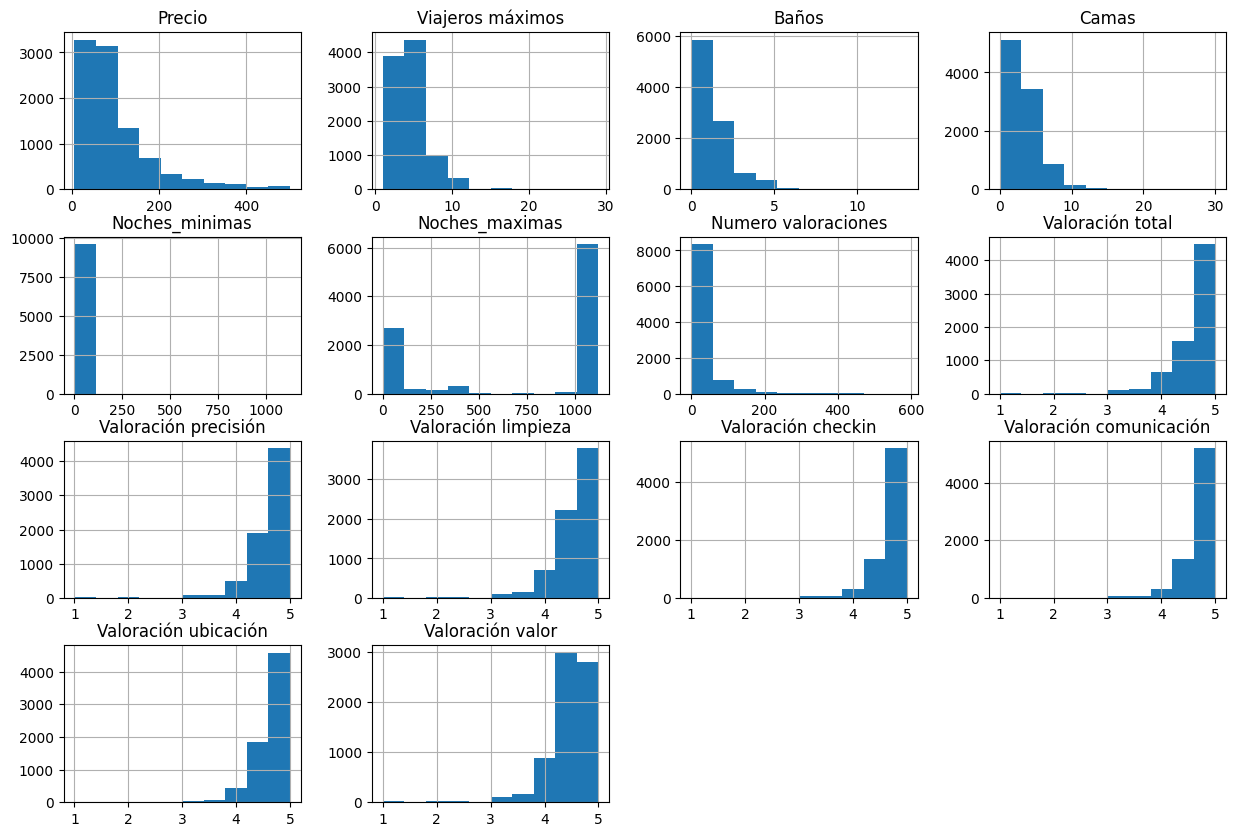

In [35]:
df.hist(figsize = (15,10))

## <font color='orange'> Análisis preliminar - datos object

In [36]:
#Obtener los nombres de las columnas de tipo 'object'
nombres_columnas_object = df.select_dtypes(include=['object']).columns
nombres_columnas_object

Index(['ID', 'ID_anfitrion', 'Nombre del título', 'Descripción',
       'Disponibilidad', 'Tipo de habitación', 'Pais', 'Ciudad', 'Latitud',
       'Longitud', 'Fecha_inserción', 'Lista_amenidades'],
      dtype='object')

In [37]:
#Valores únicos en la columna 'Tipo de habitación' y sus %
frecuencias = df['Tipo de habitación'].value_counts(normalize=True) * 100
print(frecuencias.round(2).astype(str)+'%')

Tipo de habitación
Alojamiento entero       69.17%
Habitación privada       29.24%
Hotel                     0.85%
Habitación compartida     0.75%
Name: proportion, dtype: object


In [38]:
#Valores únicos en la columna "Pais"
df['Pais'].unique()

array(['Spain'], dtype=object)

In [39]:
#Valores únicos en la columna "Ciudad"
print(df['Ciudad'].unique())

#Calcular la frecuencia de cada ciudad único
frecuencias_ciudad = df['Ciudad'].value_counts(normalize=True) * 100
print(frecuencias_ciudad.round(2).astype(str) + '%')

['Valencia' 'Barcelona' 'Madrid' 'Girona' 'Malaga' 'Menorca' 'Mallorca'
 nan 'Sevilla']
Ciudad
Barcelona    28.17%
Madrid        22.1%
Mallorca     16.41%
Girona       15.39%
Valencia      5.32%
Malaga        5.23%
Sevilla       5.12%
Menorca       2.26%
Name: proportion, dtype: object


In [40]:
#Extraer el año de la columna 'Fecha_inserción'
df['Fecha_inserción'] = pd.to_datetime(df['Fecha_inserción'])
año = df['Fecha_inserción'].dt.year

#Calcular la frecuencia de cada año único
frecuencias_años = año.value_counts(normalize=True) * 100

print(frecuencias_años.round(2).astype(str) + '%')

Fecha_inserción
2019    34.08%
2020    30.86%
2018    21.14%
2017     8.15%
2021     5.77%
Name: proportion, dtype: object


In [41]:
#Guardamos el csv WhiteHosting estructurado2
df.to_csv('WhiteHosting estructurado2.csv', index=False)

## <font color='orange'> Primer Hipotésis

En el dataset de alojamientos turísticos en España, encontramos ciudades turísticas populares como Valencia, Barcelona, Madrid, Girona, Málaga, Menorca, Mallorca y Sevilla. Barcelona (28.17%) y Madrid (22.1%) presentan el mayor porcentaje de ofertas.

Al analizar los tipos de alojamientos, casi el 70% son alojamientos enteros, lo que podría indicar una preferencia por espacios privados. La capacidad media es de 4 ocupantes, con una media de 1-2 baños y 3 camas.

En cuanto al precio, hay una gran variabilidad, desde 6 hasta 500 euros como máximo por noche. Teniendo en cuenta que en nuestros datos hay alojamientos con capacidad para 29 personas, el precio máximo por noche no parece alto.

La tendencia temporal de los listados muestra que la mayoría de las ofertas se insertaron en los años 2019 y 2020. Esto podría tener una correlación con los precios, dado que son los años antes y durante la pandemia. Sería interesante ver las diferencias entre estos años, ya que la pandemia podría indicar un mayor interés en el mercado de alquileres turísticos privados y tener un impacto al precio.

En cuanto a la valoración total, tenemos una media alta (4.59), aunque con una presencia del 27% de valores nulos.

Continuaremos con un análisis más detallado para profundizar.

# **<font color='orange'> III. Web scraping**
Beautiful Soup, Selenium, Pandas

*Archivo separado de Web scraping de "AirBnb" para los destinos: Madrid, Barcelona, Valencia, Mallorca, Asturias*

#  **<font color='orange'>IV. Análisis exploratorio:** Airbnb

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_airbnb = pd.read_csv("C:\\Users\\Usuario\\OneDrive\\Documentos\\GitHub\\WhiteHosting\\CSVs\\CSV Finales\\Airbnb Unido.csv")

In [99]:
df_airbnb.head(2)

,Unnamed: 0,ID,Tipo de habitación,Título,Tipología,Ciudad,Localización,Municipio,Precio por noche Agosto,Precio por noche Octubre,Precio Medio,Valoración,Numero valoraciones,Dormitorios,Baños,Camas,Viajeros máximos,Distancia a PI
0,0,3586833,"Habitación en Madrid, España",Habitación,Habitación,Madrid,"40.42813,-3.64537",Madrid,26.0,NaN,26.0,NaN,NaN,1.0,1,1.0,NaN,5.079
1,1,1138900553049093343,"Habitación en Madrid, España",Habitación,Habitación,Madrid,"40.409064,-3.728734",Madrid,54.0,54.0,54.0,NaN,NaN,1.0,1,1.0,NaN,2.306


In [3]:
#Eliminamos la columna 'Unnamed: 0'
df_airbnb.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
#Para el análisis preliminar, excluimos la columna 'Distancia a PI', ya que es una variable que añadimos y analizaremos más adelante.
df_airbnb = df_airbnb.drop(columns=['Distancia a PI'])

In [102]:
df_airbnb.shape

(11160, 16)

In [104]:
#Comprobamos si todos los ID´s son unicos y no haya ningun duplicado
ids_unicos = df_airbnb['ID'].unique()
print(len(ids_unicos))

11160


In [105]:
#Comprobamos tipos de datos
df_airbnb.dtypes

ID                            int64
Tipo de habitación           object
Título                       object
Tipología                    object
Ciudad                       object
Localización                 object
Municipio                    object
Precio por noche Agosto     float64
Precio por noche Octubre    float64
Precio Medio                float64
Valoración                  float64
Numero valoraciones         float64
Dormitorios                 float64
Baños                         int64
Camas                       float64
Viajeros máximos            float64
dtype: object

In [5]:
#Cambiamos el tipo de dato a número entero de las columnas de precios, "Numero valoraciones", "Dormitorios", "Camas" y "Viajeros máximos".
columnas_a_convertir = ['Precio por noche Agosto', 'Precio por noche Octubre', 
                      'Precio Medio', 'Numero valoraciones', 'Dormitorios', 
                      'Camas', 'Viajeros máximos']

df_airbnb[columnas_a_convertir] = df_airbnb[columnas_a_convertir].astype('Int64')

#Convertimos la columna 'ID' a tipo 'object'
df_airbnb['ID'] = df_airbnb['ID'].astype(object)



In [107]:
#Comprobamos si ha sido efectivo el cambio. OK
df_airbnb.dtypes

ID                           object
Tipo de habitación           object
Título                       object
Tipología                    object
Ciudad                       object
Localización                 object
Municipio                    object
Precio por noche Agosto       Int64
Precio por noche Octubre      Int64
Precio Medio                  Int64
Valoración                  float64
Numero valoraciones           Int64
Dormitorios                   Int64
Baños                         int64
Camas                         Int64
Viajeros máximos              Int64
dtype: object

In [108]:
df_airbnb.columns

Index(['ID', 'Tipo de habitación', 'Título', 'Tipología', 'Ciudad',
       'Localización', 'Municipio', 'Precio por noche Agosto',
       'Precio por noche Octubre', 'Precio Medio', 'Valoración',
       'Numero valoraciones', 'Dormitorios', 'Baños', 'Camas',
       'Viajeros máximos'],
      dtype='object')

In [109]:
#Analizamos los nulos
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        11160 non-null  object 
 1   Tipo de habitación        11060 non-null  object 
 2   Título                    11060 non-null  object 
 3   Tipología                 11060 non-null  object 
 4   Ciudad                    11160 non-null  object 
 5   Localización              9637 non-null   object 
 6   Municipio                 11055 non-null  object 
 7   Precio por noche Agosto   4908 non-null   Int64  
 8   Precio por noche Octubre  6769 non-null   Int64  
 9   Precio Medio              7499 non-null   Int64  
 10  Valoración                5646 non-null   float64
 11  Numero valoraciones       6656 non-null   Int64  
 12  Dormitorios               11053 non-null  Int64  
 13  Baños                     11160 non-null  int64  
 14  Camas 

In [110]:
print(f'------- Nulos por columna:\n{df_airbnb.isna().sum()}')
print(f'------- Nulos totales:\n{df_airbnb.isna().sum().sum()}')

------- Nulos por columna:
ID                             0
Tipo de habitación           100
Título                       100
Tipología                    100
Ciudad                         0
Localización                1523
Municipio                    105
Precio por noche Agosto     6252
Precio por noche Octubre    4391
Precio Medio                3661
Valoración                  5514
Numero valoraciones         4504
Dormitorios                  107
Baños                          0
Camas                       1907
Viajeros máximos            3089
dtype: int64
------- Nulos totales:
31353


In [111]:
print(f"Porcentaje de nulos sobre columna 'Localización' : {round(2374/11160  * 100, 1)}%")
print("-----------------------------")
print(f"Porcentaje de nulos sobre columna 'Precio por noche Agosto'  : {round(6252/11160  * 100, 1)}%")
print("-----------------------------")
print(f"Porcentaje de nulos sobre columna 'Precio por noche Octubre'  : {round(4391/11160  * 100, 1)}%")
print("-----------------------------")
print(f"Porcentaje de nulos sobre columna 'Precio Medio'  : {round(3661/11160  * 100, 1)}%")
print("-----------------------------")
print(f"Porcentaje de nulos sobre columna 'Valoración'  : {round(5514/11160  * 100, 1)}%")
print("-----------------------------")
print(f"Porcentaje de nulos sobre columna 'Numero valoraciones'  : {round(4504/11160  * 100, 1)}%")
print("-----------------------------")
print(f"Porcentaje de nulos sobre columna 'Camas'  : {round(1907/11160  * 100, 1)}%")
print("-----------------------------")
print(f"Porcentaje de nulos sobre columna 'Viajeros máximos'  : {round(3089/11160  * 100, 1)}%")

Porcentaje de nulos sobre columna 'Localización' : 21.3%
-----------------------------
Porcentaje de nulos sobre columna 'Precio por noche Agosto'  : 56.0%
-----------------------------
Porcentaje de nulos sobre columna 'Precio por noche Octubre'  : 39.3%
-----------------------------
Porcentaje de nulos sobre columna 'Precio Medio'  : 32.8%
-----------------------------
Porcentaje de nulos sobre columna 'Valoración'  : 49.4%
-----------------------------
Porcentaje de nulos sobre columna 'Numero valoraciones'  : 40.4%
-----------------------------
Porcentaje de nulos sobre columna 'Camas'  : 17.1%
-----------------------------
Porcentaje de nulos sobre columna 'Viajeros máximos'  : 27.7%


## <font color='orange'> Análisis preliminar - datos númericos

In [112]:
df_airbnb.head(3)

,ID,Tipo de habitación,Título,Tipología,Ciudad,Localización,Municipio,Precio por noche Agosto,Precio por noche Octubre,Precio Medio,Valoración,Numero valoraciones,Dormitorios,Baños,Camas,Viajeros máximos
0,3586833,"Habitación en Madrid, España",Habitación,Habitación,Madrid,"40.42813,-3.64537",Madrid,26,<NA>,26,NaN,<NA>,1,1,1,<NA>
1,1138900553049093343,"Habitación en Madrid, España",Habitación,Habitación,Madrid,"40.409064,-3.728734",Madrid,54,54,54,NaN,<NA>,1,1,1,<NA>
2,813055075285618470,"Alojamiento entero: piso en Madrid, España",Alojamiento entero,Alojamiento,Madrid,"40.363582,-3.589946",Madrid,<NA>,96,96,4.8,15,1,1,2,2


In [113]:
df_airbnb.describe()

,Precio por noche Agosto,Precio por noche Octubre,Precio Medio,Valoración,Numero valoraciones,Dormitorios,Baños,Camas,Viajeros máximos
count,4908.0,6769.0,7499.0,5646.000000,6656.0,11053.0,11160.000000,9253.0,8071.0
mean,150.615526,148.247304,150.164955,4.657869,54.525541,1.697367,1.419982,2.44364,4.007806
std,139.488395,218.132152,159.878697,0.263395,93.500048,1.031914,1.022751,1.602185,1.752269
min,1.0,10.0,1.0,2.000000,1.0,0.0,0.000000,0.0,0.0
25%,55.0,60.0,62.0,4.550000,4.0,1.0,1.000000,1.0,2.0
50%,110.0,99.0,109.0,4.710000,19.0,1.0,1.000000,2.0,4.0
75%,192.0,170.0,180.0,4.820000,62.0,2.0,1.000000,3.0,5.0
max,1567.0,8211.0,4110.0,5.000000,1204.0,8.0,8.000000,9.0,9.0


In [114]:
#Buscamos el índice de la fila con el valor mínimo(1) en la columna 'Precio por noche Agosto', porque sospechamos que este dato es incorrecto
indice_min_precio = df_airbnb['Precio por noche Agosto'].idxmin()

#Mostrar la fila correspondiente al valor mínimo
fila_min_precio = df_airbnb.loc[indice_min_precio]
print(fila_min_precio)

ID                                                                    5936519
Tipo de habitación          Alojamiento entero: villa en Costa de la Calma...
Título                                                     Alojamiento entero
Tipología                                                         Alojamiento
Ciudad                                                               Mallorca
Localización                                                   39.5274,2.4673
Municipio                                                   Costa de la Calma
Precio por noche Agosto                                                     1
Precio por noche Octubre                                                  850
Precio Medio                                                              426
Valoración                                                                NaN
Numero valoraciones                                                      <NA>
Dormitorios                                                     

En las columnas de precios, hemos decidido cambiar todos los valores menores a 10 euros a NaN. Sospechamos que se trata de un error. Consideramos que ningún alojamiento puede costar menos de 10 euros por noche.

In [115]:
#Columnas a modificar
columnas = ['Precio por noche Agosto', 'Precio por noche Octubre', 'Precio Medio']

#Reemplazar valores menores a 10 por NaN en las columnas especificadas
df_airbnb[columnas] = df_airbnb[columnas].apply(lambda col: col.map(lambda x: np.nan if x < 10 else x))



In [116]:
#Comprobamos
df_airbnb.describe()

,Precio por noche Agosto,Precio por noche Octubre,Precio Medio,Valoración,Numero valoraciones,Dormitorios,Baños,Camas,Viajeros máximos
count,4864.000000,6769.000000,7493.000000,5646.000000,6656.0,11053.0,11160.000000,9253.0,8071.0
mean,151.963816,148.247304,150.284265,4.657869,54.525541,1.697367,1.419982,2.44364,4.007806
std,139.392328,218.132152,159.887069,0.263395,93.500048,1.031914,1.022751,1.602185,1.752269
min,10.000000,10.000000,10.000000,2.000000,1.0,0.0,0.000000,0.0,0.0
25%,56.000000,60.000000,62.000000,4.550000,4.0,1.0,1.000000,1.0,2.0
50%,110.000000,99.000000,109.000000,4.710000,19.0,1.0,1.000000,2.0,4.0
75%,194.000000,170.000000,180.000000,4.820000,62.0,2.0,1.000000,3.0,5.0
max,1567.000000,8211.000000,4110.000000,5.000000,1204.0,8.0,8.000000,9.0,9.0


In [117]:
#Buscamos el índice de la fila con el valor máximo(8211) en la columna 'Precio por noche Octubre', porque sospechamos que este dato es incorrecto
indice_max_precio = df_airbnb['Precio por noche Octubre'].idxmax()

#Mostrar la fila correspondiente al valor máximo
fila_max_precio = df_airbnb.loc[indice_max_precio]
print(fila_max_precio)

ID                              944697025563542594
Tipo de habitación          Barco en Palma, España
Título                                       Barco
Tipología                                    Barco
Ciudad                                    Mallorca
Localización                      39.57244,2.64622
Municipio                                    Palma
Precio por noche Agosto                        NaN
Precio por noche Octubre                    8211.0
Precio Medio                                4110.0
Valoración                                     NaN
Numero valoraciones                           <NA>
Dormitorios                                      5
Baños                                            3
Camas                                            8
Viajeros máximos                                 1
Name: 4460, dtype: object


*Encontramos que el precio por noche en octubre puede ser real, dado que el tipo de alojamiento es un barco. Por esta razón, decidimos mantenerlo, ya que consideramos que puede ser interesante observar los precios elevados y su relación con otros valores de un alojamiento tan especial y lujoso como un barco.*

## <font color='orange'> Análisis preliminar - datos object

In [119]:
df_airbnb.head(2)

,ID,Tipo de habitación,Título,Tipología,Ciudad,Localización,Municipio,Precio por noche Agosto,Precio por noche Octubre,Precio Medio,Valoración,Numero valoraciones,Dormitorios,Baños,Camas,Viajeros máximos
0,3586833,"Habitación en Madrid, España",Habitación,Habitación,Madrid,"40.42813,-3.64537",Madrid,26.0,NaN,26.0,NaN,<NA>,1,1,1,<NA>
1,1138900553049093343,"Habitación en Madrid, España",Habitación,Habitación,Madrid,"40.409064,-3.728734",Madrid,54.0,54.0,54.0,NaN,<NA>,1,1,1,<NA>


In [120]:
#Obtener los nombres de las columnas de tipo 'object'
nombres_columnas_object = df_airbnb.select_dtypes(include=['object']).columns
nombres_columnas_object

Index(['ID', 'Tipo de habitación', 'Título', 'Tipología', 'Ciudad',
       'Localización', 'Municipio'],
      dtype='object')

In [121]:
#Valores únicos en la columna 'Tipología' y sus %
frecuencias = df_airbnb['Tipología'].value_counts(normalize=True) * 100
print(frecuencias.round(2).astype(str)+'%')

Tipología
Alojamiento              68.69%
Habitación               30.19%
Caravana/autocaravana     0.42%
Barco                     0.31%
Casa                      0.13%
Minicasa                  0.12%
Yurta                     0.04%
Isla                      0.04%
Granja                    0.03%
Granero                   0.02%
Suelo                     0.01%
Camping                   0.01%
Torre                     0.01%
Name: proportion, dtype: object


In [122]:
#Comprobando datos en la columna de 'Título' y sus %
frecuencias = df_airbnb['Título'].value_counts(normalize=True) * 100
print(frecuencias.round(2).astype(str)+'%')

Título
Alojamiento entero        56.76%
Habitación                28.26%
Alojamiento               11.92%
Habitación privada en      1.92%
Caravana/autocaravana      0.42%
Barco                      0.31%
Minicasa                   0.12%
Casa                       0.06%
Yurta                      0.04%
Isla                       0.04%
Granja                     0.03%
Casa particular            0.03%
Casa flotante              0.02%
Granero                    0.02%
Camping                    0.01%
Casa particular cubana     0.01%
Torre                      0.01%
Casa domo                  0.01%
Habitación privada         0.01%
Suelo                      0.01%
Alojamiento Luxury         0.01%
Name: proportion, dtype: object


In [124]:
#Juntamos los nombres 'Granja - Granero' y 'Suelo - Camping' ya que son tipos de alojamientos iguales.
df_airbnb['Tipología'] = df_airbnb['Tipología'].replace({'Granero': 'Granja', 'Suelo': 'Camping'})

In [125]:
#Comprobamos
frecuencias = df_airbnb['Tipología'].value_counts(normalize=True) * 100
print(frecuencias.round(2).astype(str)+'%')

Tipología
Alojamiento              68.69%
Habitación               30.19%
Caravana/autocaravana     0.42%
Barco                     0.31%
Casa                      0.13%
Minicasa                  0.12%
Granja                    0.05%
Yurta                     0.04%
Isla                      0.04%
Camping                   0.02%
Torre                     0.01%
Name: proportion, dtype: object


In [126]:
#Valores únicos en la columna "Ciudad"
print(df_airbnb['Ciudad'].unique())

#Calcular la frecuencia de cada ciudad único
frecuencias_ciudad = df_airbnb['Ciudad'].value_counts(normalize=True) * 100
print(frecuencias_ciudad.round(2).astype(str) + '%')

['Madrid' 'Mallorca' 'Barcelona' 'Valencia' 'Asturias']
Ciudad
Mallorca     23.44%
Valencia     23.41%
Madrid       21.34%
Barcelona    18.66%
Asturias     13.15%
Name: proportion, dtype: object


## <font color='orange'> Primer Hipotésis /Airbnb

En el dataset único de Airbnb, encontramos destinos en Valencia, Barcelona, Madrid, Mallorca y Asturias. Mallorca (28.17%) y Valencia (22.1%) presentan el mayor porcentaje de ofertas, aunque esto se debe al web scraping que realizamos nosotros para recopilar las ofertas y no necesariamente a que estos destinos tengan el mayor número de alojamientos en oferta en la página de Airbnb. Es importante destacar que nuestro cliente nos ha solicitado un análisis de solo tres de las ciudades mencionadas, pero como profesionales que conocemos bien el negocio, consideramos que las ciudades adicionales serán relevantes y aportarán mucho valor al análisis, enriqueciendo la representación de nuestro proyecto y apoyando las decisiones en el futuro proyecto de White Hosting.

Al analizar los tipos de alojamientos, casi el 70% son alojamientos, lo que podría indicar una preferencia por espacios privados. La capacidad media es de 4 ocupantes, con un promedio de 1-2 baños y 2-3 camas, similar al dataset original.

En cuanto al precio, hay una gran variabilidad, desde 10 hasta 8211 euros como máximo por noche. Aunque este precio máximo se refiere al alquiler de un barco para 8 viajeros, nos parece muy alto y estamos planeando investigar la relación del precio con otros factores más adelante en nuestro proyecto.

Mientras que los datos del dataset original son registros de 2019 y 2020, todos los datos de Airbnb son actuales y fueron descargados en mayo de 2024. Esto podría explicar el aumento de precios entre los dos datasets.

En cuanto a la valoración total, el promedio es 4.65 de 5.00, lo cual consideramos una buena evaluación en general. Sin embargo, con una presencia del 49% de valores nulos, que es muy alta, esto podría indicar que hay muchas ofertas nuevas que todavía no tienen valoración.

Seguimos con un analisis más profundo.

# **<font color='orange'> V. Análisis detallado**
<font color='orange'> Respondiendo las preguntas

In [161]:
#Cargamos los dos datasets para seguir analizando y responder las preguntas
df_wh = pd.read_csv("C:\\Users\\Usuario\\OneDrive\\Documentos\\GitHub\\WhiteHosting\\CSVs\\CSV Finales\\WhiteHosting_final.csv")
#df_airbnb = pd.read_csv("C:\\Users\\Usuario\\OneDrive\\Documentos\\GitHub\\WhiteHosting\\CSVs\\CSV Finales\\Airbnb Unido.csv")

## <font color='orange'> 1. ¿Cuantos inmuebles únicos hay en el dataset vs airbnb?

In [162]:
#Inmuebles únicos
num_ids_unicos1 = df_wh['ID'].nunique()
print(f"El número de inmuebles únicos en el DataFrame de White Hosting es: {num_ids_unicos1}")

num_ids_unicos2 = df_airbnb['ID'].nunique()
print(f"El número de inmuebles únicos en el DataFrame de Airbnb es: {num_ids_unicos2}")

print("----------------------------------")
ids_unicos_total = pd.concat([df_wh['ID'], df_airbnb['ID']]).nunique()
print(f"El número total de IDs únicos entre ambos DataFrames es: {ids_unicos_total}")

print("----------------------------------")
diferencia_ids = (num_ids_unicos1 + num_ids_unicos2) - ids_unicos_total
print(f"La diferencia de Id´s en los Dataframes es: {diferencia_ids}")

#IDs duplicados
print("----------------------------------")
ids_duplicados = pd.concat([df_wh['ID'], df_airbnb['ID']]).duplicated()
num_ids_duplicados = ids_duplicados.sum()
print(f"El número de ID´s duplicados es: {num_ids_duplicados}")

El número de inmuebles únicos en el DataFrame de White Hosting es: 9650
El número de inmuebles únicos en el DataFrame de Airbnb es: 11160
----------------------------------
El número total de IDs únicos entre ambos DataFrames es: 20598
----------------------------------
La diferencia de Id´s en los Dataframes es: 212
----------------------------------
El número de ID´s duplicados es: 212


## <font color='orange'> 2. ¿Cual es la diferencia en número de inmueble posteados entre los 2 datasets?

In [163]:
diferencia_ids = (num_ids_unicos1 + num_ids_unicos2) - ids_unicos_total
print(f"La diferencia de Id´s en los Dataframes es: {diferencia_ids}")

La diferencia de Id´s en los Dataframes es: 212


## <font color='orange'> 3. ¿Cuáles son los parámetros que forman el precio?

<font color='orange'> **1)Analizamos el df de White Hosting**

In [164]:
df_wh.columns

Index(['ID', 'ID_anfitrion', 'Nombre del título', 'Descripción', 'Precio',
       'Disponibilidad', 'Tipo de habitación', 'Viajeros máximos', 'Baños',
       'Camas', 'Noches_minimas', 'Noches_maximas', 'Numero valoracines',
       'Valoración total', 'Valoración precisión', 'Valoración limpieza',
       'Valoración checkin', 'Valoración comunicación', 'Valoración ubicación',
       'Valoración valor', 'Pais', 'Ciudad', 'Latitud', 'Longitud',
       'Fecha_inserción', 'Lista_amenidades'],
      dtype='object')

In [165]:
df_wh.corr(numeric_only=True)['Precio'].sort_values(ascending=False)

Precio                     1.000000
Viajeros máximos           0.601284
Camas                      0.551529
Baños                      0.491841
Noches_maximas             0.045900
Valoración total           0.043846
Valoración limpieza        0.043179
ID                         0.013869
Valoración ubicación      -0.001427
Valoración comunicación   -0.008014
Valoración precisión      -0.008374
ID_anfitrion              -0.010747
Valoración checkin        -0.024612
Noches_minimas            -0.025254
Valoración valor          -0.031743
Numero valoracines        -0.141560
Name: Precio, dtype: float64

In [166]:
#Seleccionamos las columnas númericas con una mayor correlacion y las columnas string de nuestro interés.
#*Columnas string: nuestro hipotésis es que el precio puede variar dependiendo de la fecha y ciudad entre otros parámetros.
df_estudio1 = df_wh[['ID','Ciudad', 'Tipo de habitación', 'Precio', 'Viajeros máximos', 'Camas', 'Baños', 'Fecha_inserción' ]]
df_estudio1.head(2)

,ID,Ciudad,Tipo de habitación,Precio,Viajeros máximos,Camas,Baños,Fecha_inserción
0,36187629,Valencia,Alojamiento entero,90.0,4,3.0,2,2019-12-31
1,5388904,Barcelona,Habitación privada,100.0,1,1.0,1,2021-01-12


In [167]:
df_estudio1.dtypes

ID                      int64
Ciudad                 object
Tipo de habitación     object
Precio                float64
Viajeros máximos        int64
Camas                 float64
Baños                   int64
Fecha_inserción        object
dtype: object

In [168]:
#Creamos una copia
df_estudio1 = df_estudio1.copy()

#Convertimos la columna de "Fecha_inserción" a tipo 'date'
df_estudio1['Fecha_inserción'] = pd.to_datetime(df_estudio1['Fecha_inserción'])

#Añadimos una columna de "Año" de tipo int
df_estudio1['Año'] = df_estudio1['Fecha_inserción'].dt.year

In [169]:
df_estudio1.dtypes

ID                             int64
Ciudad                        object
Tipo de habitación            object
Precio                       float64
Viajeros máximos               int64
Camas                        float64
Baños                          int64
Fecha_inserción       datetime64[ns]
Año                            int32
dtype: object

In [170]:
df_estudio1.head(2)

,ID,Ciudad,Tipo de habitación,Precio,Viajeros máximos,Camas,Baños,Fecha_inserción,Año
0,36187629,Valencia,Alojamiento entero,90.0,4,3.0,2,2019-12-31,2019
1,5388904,Barcelona,Habitación privada,100.0,1,1.0,1,2021-01-12,2021


Recuento de valores para 'Ciudad':
Ciudad
Barcelona    2717
Madrid       2132
Mallorca     1583
Girona       1484
Valencia      513
Malaga        504
Sevilla       494
Menorca       218
Name: count, dtype: int64
-----------------------
Desviación estándar de los precios promedio por 'Ciudad':
39.71859352946416
-----------------------
Coeficiente de variación de los precios promedio por 'Ciudad': 0.37738854566180674
-----------------------


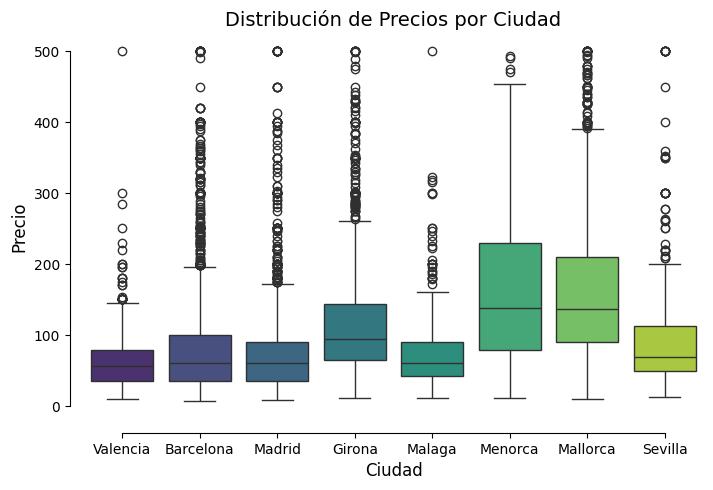

Recuento de valores para 'Tipo de habitación':
Tipo de habitación
Alojamiento entero       6674
Habitación privada       2821
Hotel                      82
Habitación compartida      72
Name: count, dtype: int64
-----------------------
Desviación estándar de los precios promedio por 'Tipo de habitación':
38.31654483062951
-----------------------
Coeficiente de variación de los precios promedio por 'Tipo de habitación': 0.4688931391692914
-----------------------


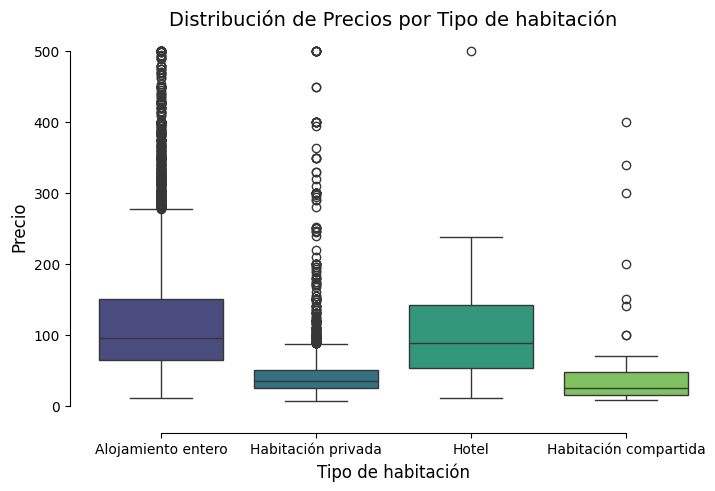

Recuento de valores para 'Viajeros máximos':
Viajeros máximos
2     2445
4     2196
6     1518
1      813
8      666
5      655
3      650
7      207
10     205
9       99
12      94
16      50
11      21
14      14
13       7
15       5
18       1
24       1
29       1
20       1
19       1
Name: count, dtype: int64
-----------------------
Desviación estándar de los precios promedio por 'Viajeros máximos':
117.75589148487495
-----------------------
Coeficiente de variación de los precios promedio por 'Viajeros máximos': 0.5792558961620301
-----------------------


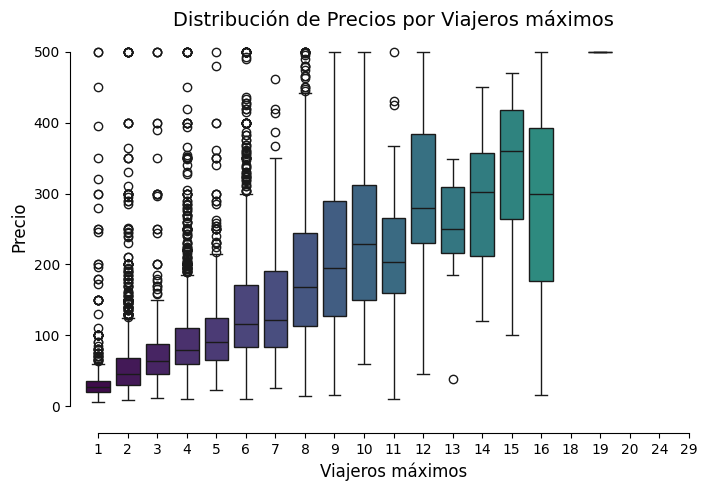

Recuento de valores para 'Camas':
Camas
1.0     3108
2.0     1843
3.0     1529
4.0     1136
5.0      770
6.0      497
7.0      223
0.0      167
8.0      161
9.0       71
10.0      61
12.0      27
16.0      14
11.0       9
14.0       9
15.0       5
13.0       5
18.0       3
22.0       3
20.0       2
28.0       2
17.0       1
30.0       1
21.0       1
Name: count, dtype: int64
-----------------------
Desviación estándar de los precios promedio por 'Camas':
110.44372163711837
-----------------------
Coeficiente de variación de los precios promedio por 'Camas': 0.47475037539440185
-----------------------


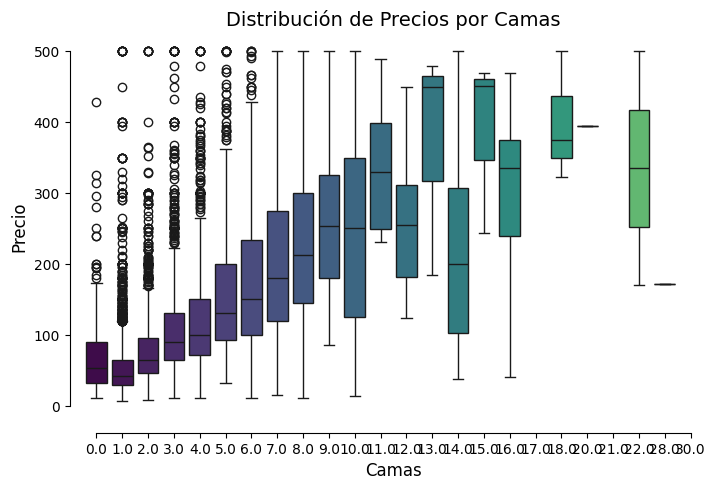

Recuento de valores para 'Baños':
Baños
1     5778
2     2681
3      650
4      262
5      104
0       90
6       42
7       18
8       13
9        5
12       3
11       2
10       1
13       1
Name: count, dtype: int64
-----------------------
Desviación estándar de los precios promedio por 'Baños':
100.39495936585344
-----------------------
Coeficiente de variación de los precios promedio por 'Baños': 0.5201569569591846
-----------------------


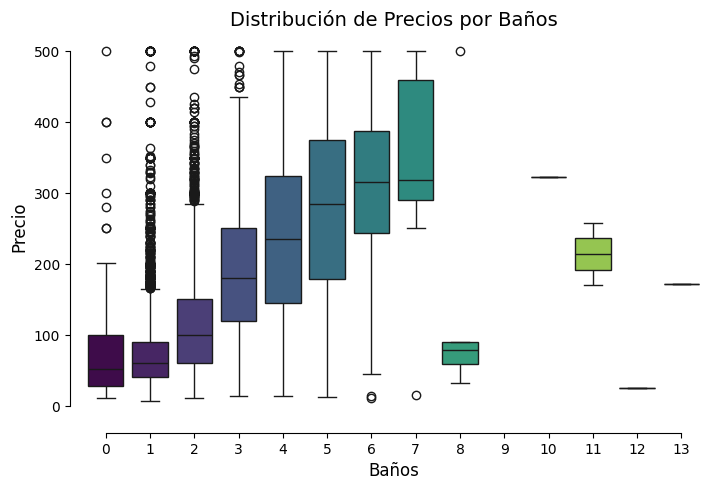

Recuento de valores para 'Año':
Año
2019    3289
2020    2978
2018    2040
2017     786
2021     557
Name: count, dtype: int64
-----------------------
Desviación estándar de los precios promedio por 'Año':
7.977118527582266
-----------------------
Coeficiente de variación de los precios promedio por 'Año': 0.08113055837675827
-----------------------


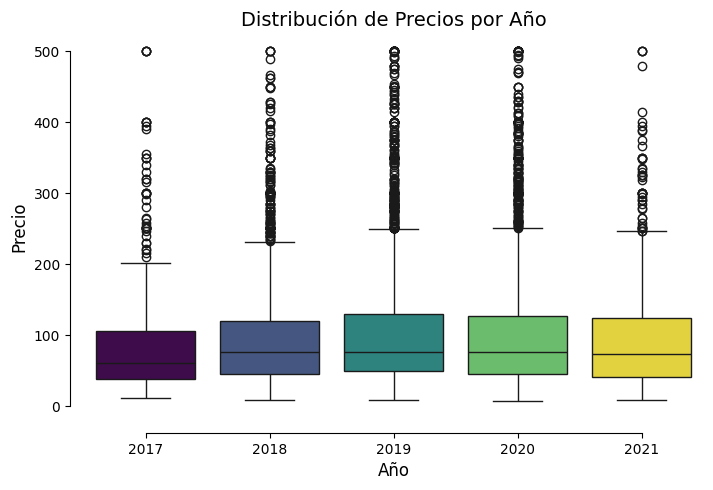

In [171]:
#Función para analizar la relación entre precio y cada variable individualmente
def analizar_relacion_precio(df, columna):
    #Imprimir recuento de valores para las columnas específicas
    print(f"Recuento de valores para '{columna}':")
    print(df_estudio1[columna].value_counts())
    print("-----------------------")
    
    #Calcular desviación estándar de los precios promedio por cada categoría
    std_precios = df_estudio1.groupby(columna).Precio.mean().std()
    print(f"Desviación estándar de los precios promedio por '{columna}':")
    print(std_precios)
    print("-----------------------")
    
    #Calcular el coeficiente de variación de los precios promedio por cada categoría
    cv = std_precios / df_estudio1.groupby(columna).Precio.mean().mean()
    print(f"Coeficiente de variación de los precios promedio por '{columna}': {cv}")
    print("-----------------------")

    #Boxplot de Precio por cada categoría
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=columna, y='Precio', data=df_estudio1, hue=columna, palette='viridis', dodge=False)
    plt.title(f'Distribución de Precios por {columna}', fontsize=14)
    plt.xlabel(columna, fontsize=12)
    plt.ylabel('Precio', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    sns.despine(offset=10, trim=True)
    plt.legend([],[], frameon=False) #Desactivamos la leyenda ya que no es necesaria
    plt.show()
    

#Llamamos a la función para cada variable individualmente
columnas_de_interes = ['Ciudad', 'Tipo de habitación', 'Viajeros máximos', 'Camas', 'Baños', 'Año']
for columna in columnas_de_interes:
    analizar_relacion_precio(df_estudio1, columna)

*Conclusión WhiteHosting* 

**Los factores que más influyen el precio**
1. Viajeros máximos (CV: 57.93%)
2. Baños (CV: 52.02%)
3. Camas (CV: 47.48%)
4. Tipo de habitación (CV: 46.89%)

- La capacidad máxima de viajeros presenta una alta variabilidad en los precios. Es uno de los factores que más influye en el precio, indicando que a medida que aumenta la capacidad de viajeros, también lo hace la variabilidad en los precios. Esto tiene sentido porque tenemos precios por noche y no por persona. Por las mismas razones, el número de baños y camas influyen en el precio.

- Mientras el tipo de habitación es también un factor principal, que no necesariamente viene determinado por el número de personas en una reserva. Los alojamientos enteros y los hoteles tienen precios promedio más altos. Nos gustaría analizar este factor más adelante.

**Factores moderadamente influyentes:** Ciudad (CV: 37.74%)
- Ciudades con los precios más altos: Menorca y Mallorca

**Factor menos influyente:** Año (CV: 8.11%)
- La variabilidad del precio a través de los años es relativamente baja. Con una CV del 8.11%, el año de inserción de los datos es el factor que menos influye en la variabilidad de los precios, indicando que los precios no varían mucho año a año.

**En resumen** , en el dataset original de WhiteHosting los parámetros que más influyen en el precio son la capacidad máxima de viajeros, el número de baños, el número de camas y el tipo de habitación. La ciudad también tiene un impacto considerable, aunque menor en comparación con los anteriores. El año de inserción es el factor que menos afecta la variabilidad de los precios.

<font color='orange'> **2)Analizamos el df de Airbnb**

In [179]:
df_airbnb.head(2)

,ID,Tipo de habitación,Título,Tipología,Ciudad,Localización,Municipio,Precio por noche Agosto,Precio por noche Octubre,Precio Medio,Valoración,Numero valoraciones,Dormitorios,Baños,Camas,Viajeros máximos
0,3586833,"Habitación en Madrid, España",Habitación,Habitación,Madrid,"40.42813,-3.64537",Madrid,26.0,NaN,26.0,NaN,NaN,1.0,1,1.0,NaN
1,1138900553049093343,"Habitación en Madrid, España",Habitación,Habitación,Madrid,"40.409064,-3.728734",Madrid,54.0,54.0,54.0,NaN,NaN,1.0,1,1.0,NaN


In [180]:
df_airbnb.columns

Index(['ID', 'Tipo de habitación', 'Título', 'Tipología', 'Ciudad',
       'Localización', 'Municipio', 'Precio por noche Agosto',
       'Precio por noche Octubre', 'Precio Medio', 'Valoración',
       'Numero valoraciones', 'Dormitorios', 'Baños', 'Camas',
       'Viajeros máximos'],
      dtype='object')

In [181]:
df_airbnb.corr(numeric_only=True)['Precio Medio'].sort_values(ascending=False)

Precio Medio                1.000000
Precio por noche Octubre    0.926432
Precio por noche Agosto     0.751358
Dormitorios                 0.486570
Camas                       0.413632
Baños                       0.350054
Viajeros máximos            0.186798
Numero valoraciones         0.024345
Valoración                 -0.030748
ID                         -0.113741
Name: Precio Medio, dtype: float64

In [182]:
#Seleccionamos las columnas númericas con una mayor correlacion y las columnas string de nuestro interés.
#*Columnas string: nuestro hipotésis es que el precio puede variar dependiendo de la fecha y ciudad entre otros parámetros.
df_estudio2 = df_airbnb[['ID','Ciudad', 'Tipología', 'Precio Medio', 'Precio por noche Octubre', 'Precio por noche Agosto', 'Dormitorios', 'Baños']]
#renombramos la columna Precio Medio a Precio_Medio
df_estudio2 = df_estudio2.rename(columns={'Precio Medio': 'Precio_Medio'})
df_estudio2.head(2)

,ID,Ciudad,Tipología,Precio_Medio,Precio por noche Octubre,Precio por noche Agosto,Dormitorios,Baños
0,3586833,Madrid,Habitación,26.0,NaN,26.0,1.0,1
1,1138900553049093343,Madrid,Habitación,54.0,54.0,54.0,1.0,1


Recuento de valores para 'Ciudad':
Ciudad
Mallorca     2616
Valencia     2613
Madrid       2382
Barcelona    2082
Asturias     1467
Name: count, dtype: int64
-----------------------
Desviación estándar de los precios promedio por 'Ciudad':
56.70211797883103
-----------------------
Coeficiente de variación de los precios promedio por 'Ciudad': 0.37036901298731095
-----------------------


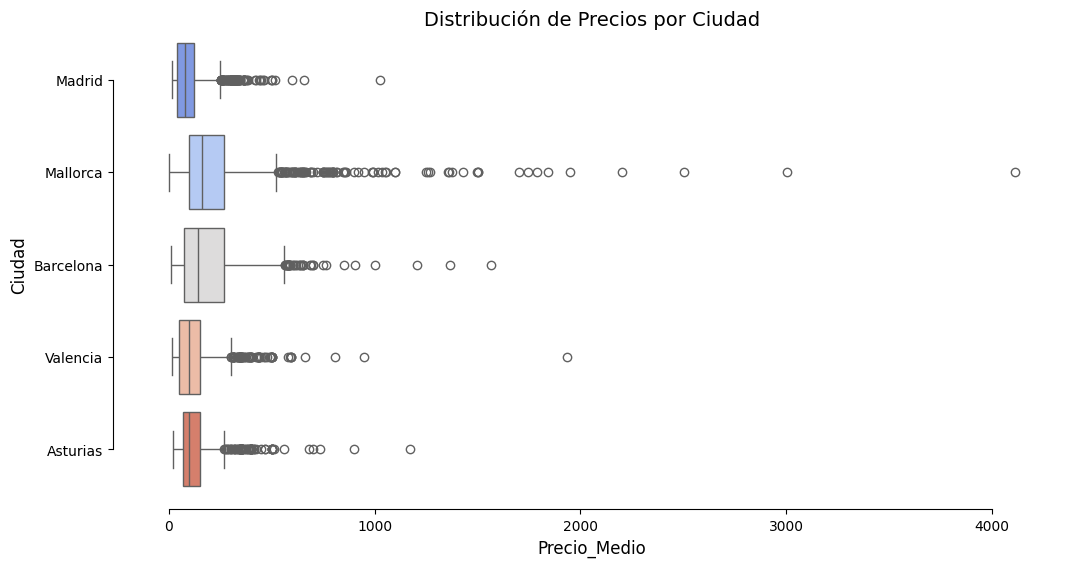

Recuento de valores para 'Tipología':
Tipología
Alojamiento              7597
Habitación               3339
Caravana/autocaravana      47
Barco                      34
Casa                       14
Minicasa                   13
Yurta                       4
Isla                        4
Granja                      3
Granero                     2
Suelo                       1
Camping                     1
Torre                       1
Name: count, dtype: int64
-----------------------
Desviación estándar de los precios promedio por 'Tipología':
126.81100251575887
-----------------------
Coeficiente de variación de los precios promedio por 'Tipología': 0.7787659270923185
-----------------------


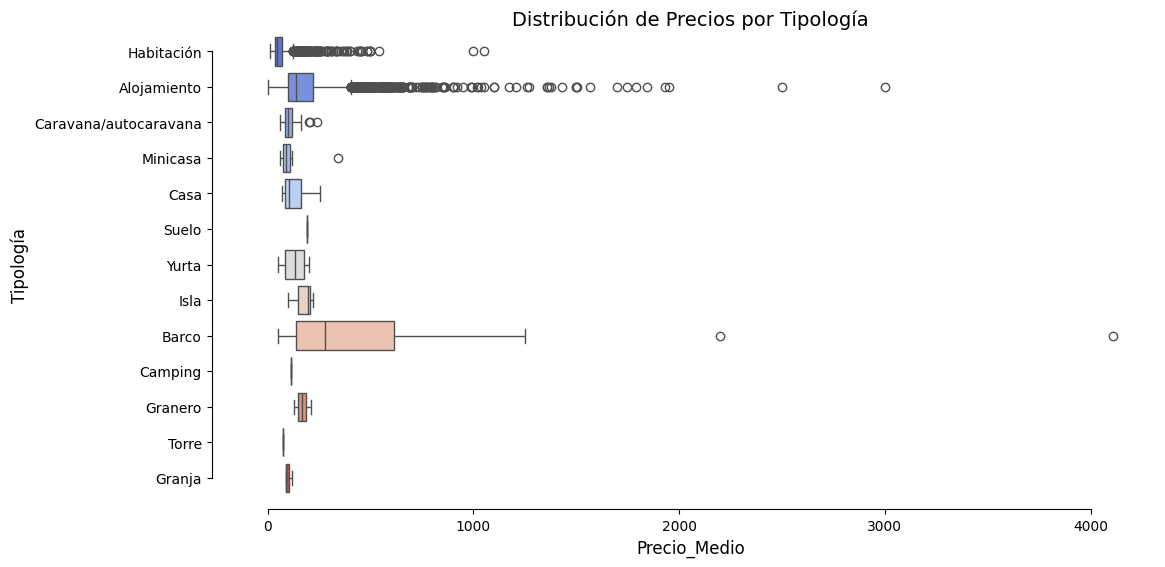

In [183]:
#Función2 para analizar la relación entre precio medio y los variables Ciudad, Tipología.
def analizar_relacion_precio2(df, columna):
    #Imprimir recuento de valores para las columnas específicas
    print(f"Recuento de valores para '{columna}':")
    print(df_estudio2[columna].value_counts())
    print("-----------------------")
    
    #Calcular desviación estándar de los precios promedio por cada categoría
    std_precios = df_estudio2.groupby(columna).Precio_Medio.mean().std()
    print(f"Desviación estándar de los precios promedio por '{columna}':")
    print(std_precios)
    print("-----------------------")
    
    #Calcular el coeficiente de variación de los precios promedio por cada categoría
    cv = std_precios / df_estudio2.groupby(columna).Precio_Medio.mean().mean()
    print(f"Coeficiente de variación de los precios promedio por '{columna}': {cv}")
    print("-----------------------")

    #Boxplot de Precio por cada categoría
    plt.figure(figsize=(12, 6))
    sns.boxplot(y=columna, x='Precio_Medio', data=df_estudio2, hue=columna, palette='coolwarm', dodge=False)
    plt.title(f'Distribución de Precios por {columna}', fontsize=14)
    plt.ylabel(columna, fontsize=12)
    plt.xlabel('Precio_Medio', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sns.despine(offset=10, trim=True)
    plt.legend([], [], frameon=False)  # Desactivamos la leyenda ya que no es necesaria
    plt.show()
    

#Llamamos a la función para cada variable individualmente
columnas_de_interes = ['Ciudad', 'Tipología']
for columna in columnas_de_interes:
    analizar_relacion_precio2(df_estudio2, columna)

Recuento de valores para 'Dormitorios':
Dormitorios
1.0    6451
2.0    2443
3.0    1446
4.0     445
5.0     151
6.0      72
0.0      29
7.0       9
8.0       7
Name: count, dtype: int64
-----------------------
Desviación estándar de los precios promedio por 'Dormitorios':
239.5069975174708
-----------------------
Coeficiente de variación de los precios promedio por 'Dormitorios': 0.6501890612946674
-----------------------
Promedio de Precio_Medio: 150.164955327377
-----------------------
Recuento de valores para 'Baños':
Baños
1    8809
2    1349
5     596
3     261
4     105
0      16
6      15
7       5
8       4
Name: count, dtype: int64
-----------------------
Desviación estándar de los precios promedio por 'Baños':
412.00730317251924
-----------------------
Coeficiente de variación de los precios promedio por 'Baños': 0.7938726965806443
-----------------------
Promedio de Precio_Medio: 150.164955327377
-----------------------


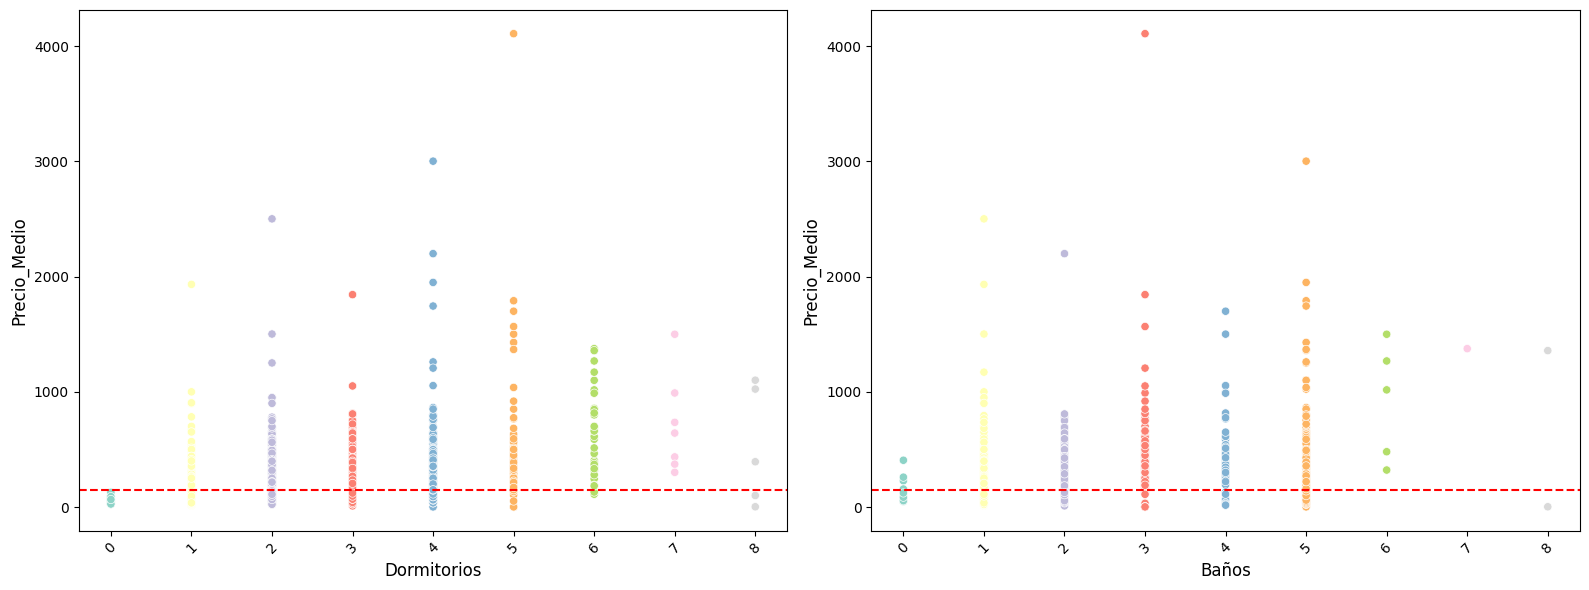

In [149]:
#Función3 para analizar la relación entre precio medio y los variables Dormitorios, Baños.
def analizar_relacion_precio3(df):
    columnas_de_interes = ['Dormitorios', 'Baños']
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))  #Crear subplots

    for i, columna in enumerate(columnas_de_interes):
        #Imprimir recuento de valores para la columna específica
        print(f"Recuento de valores para '{columna}':")
        print(df[columna].value_counts())
        print("-----------------------")
        
        #Calcular desviación estándar de los precios promedio por cada categoría
        std_precios = df.groupby(columna)['Precio_Medio'].mean().std()
        print(f"Desviación estándar de los precios promedio por '{columna}':")
        print(std_precios)
        print("-----------------------")
        
        #Calcular el coeficiente de variación de los precios promedio por cada categoría
        cv = std_precios / df.groupby(columna)['Precio_Medio'].mean().mean()
        print(f"Coeficiente de variación de los precios promedio por '{columna}': {cv}")
        print("-----------------------")

        #Calcular el promedio de los precios medios
        promedio_precio_medio = df['Precio_Medio'].mean()
        print(f"Promedio de Precio_Medio: {promedio_precio_medio}")
        print("-----------------------")

        #Gráfico de dispersión de Precio_Medio vs columna
        sns.scatterplot(x=columna, y='Precio_Medio', data=df, hue=columna, palette='Set3', ax=axs[i])
        axs[i].axhline(promedio_precio_medio, color='r', linestyle='--', label=f'Promedio de Precio_Medio: {promedio_precio_medio:.2f}')
        axs[i].set_xlabel(columna, fontsize=12)
        axs[i].set_ylabel('Precio_Medio', fontsize=12)
        axs[i].tick_params(axis='x', rotation=45, labelsize=10)
        axs[i].tick_params(axis='y', labelsize=10)
        axs[i].legend(loc='upper left', fontsize=8)

        #Quitar leyenda del gráfico principal
        axs[i].legend([],[], frameon=False)
  
    plt.tight_layout()
    plt.show()

#Llamamos a la función
analizar_relacion_precio3(df_estudio2)


*Conclusión Airbnb* 

**Los factores que más influyen el precio**
1. Baños (CV: 83.47%)
2. Tipología (CV: 82.49%)
3. Dormitorios (CV: 66.23%)

- El número de baños presenta la mayor variabilidad, lo que indica que este factor influye significativamente en el precio. La alta variabilidad sugiere que a medida que aumenta el número de baños, también lo hacen los precios. Esto tiene sentido ya que los alojamientos con más baños suelen ofrecer para más viajeros y, por lo tanto, tienen precios más altos por noche.

- La tipología del alojamiento también muestra una alta variabilidad. Podemos decir que es un factor determinante del precio. Alojamientos más exclusivos o con características especiales tienden a tener precios más altos. Los tipos de alojamientos más caros son claramente los barcos.

- El número de dormitorios influye considerablemente en los precios, indicando que los alojamientos con más dormitorios suelen tener precios más altos debido a su capacidad para alojar a más personas y ofrecer mayor comodidad.

**Factores moderadamente influyentes:** Ciudad (CV: 37.20%)
- Ciudades con los precios más altos: Mallorca y Barcelona

**En resumen** , en el dataset de Airbnb, los parámetros que más influyen en el precio son el número de baños, la tipología del alojamiento y el número de dormitorios. La ciudad también tiene un impacto considerable, aunque menor en comparación con los factores anteriores. Sería interesante ver si hay una mayor diferencia en los precios analizando la columna de "Localización", lo cual nos proporcionará más detalles referentes a la localidad exacta del alojamiento.

<font color='orange'> **3)Analizamos la lista de amenidades = servicios extras**

In [150]:
#Cargar df
df1 = pd.read_csv("C:\\Users\\Usuario\\OneDrive\\Documentos\\GitHub\\WhiteHosting\\CSVs\\CSV Finales\\Dataset unido.csv")
df2 = pd.read_csv("C:\\Users\\Usuario\\OneDrive\\Documentos\\GitHub\\WhiteHosting\\CSVs\\CSV Finales\\amenities_final.csv")

In [151]:
#Combinamos los dos df´s por la columna "ID"
df_combinado = pd.merge(df1, df2, on='ID')

In [152]:
df_servicios = df_combinado.copy()

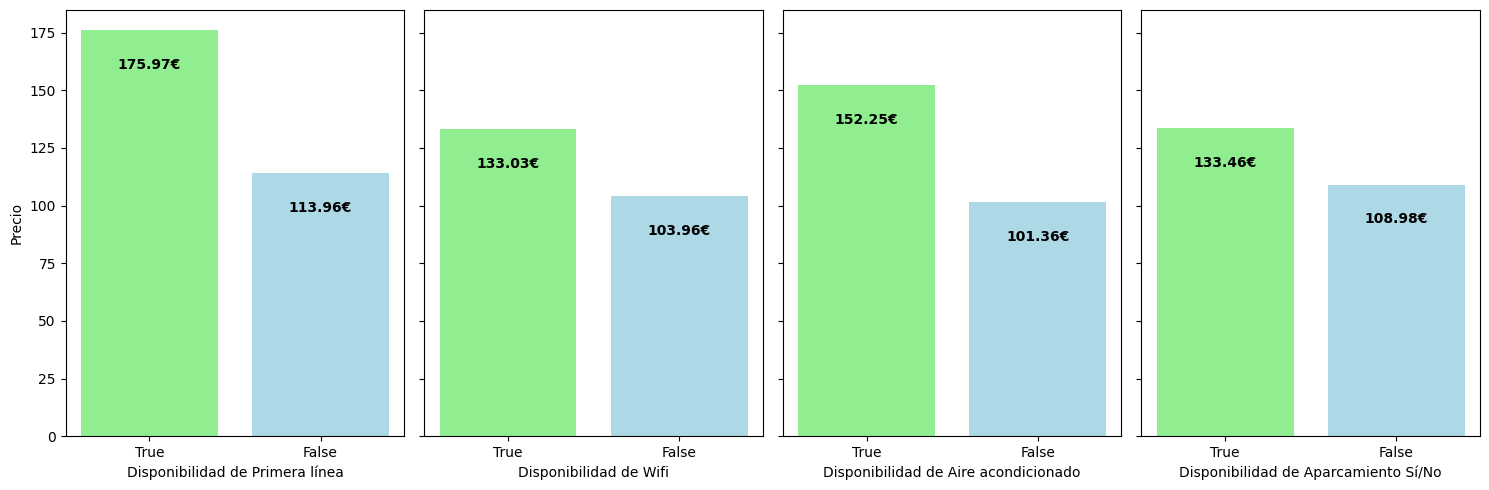

In [154]:
#Seleccionamos las columnas de interés con valores 0/1 (Sí/No)
servicios = ['Primera línea', 'Wifi', 'Aire acondicionado', 'Aparcamiento Sí/No']

#Creamos figura y ejes para subplots
fig, axes = plt.subplots(nrows=1, ncols=len(servicios), figsize=(15, 5), sharey=True)

#Iterar sobre cada servicio y crear el gráfico de barras correspondiente para cada uno de ellos
for i, servicio in enumerate(servicios):
    datos_true = df_servicios[df_servicios[servicio] == 1]
    datos_false = df_servicios[df_servicios[servicio] == 0]
    
    #Calculamos precio medio por servicio
    precio_medio_true = datos_true["Precio"].mean()
    precio_medio_false = datos_false["Precio"].mean()
    
    #Creamos el grafico
    ax = axes[i]
    bars = ax.bar(["True", "False"], [precio_medio_true, precio_medio_false], color=['lightgreen', 'lightblue'])
    
    #Etiquetamos el precio medio para una mejor comprensión
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}€',
                    xy=(bar.get_x() + bar.get_width() / 2, height),  #Posición de la etiqueta
                    xytext=(0,-30),  #Desplazamiento de la etiqueta hacia abajo
                    textcoords="offset points",  #Coordenadas de desplazamiento
                    ha='center', va='bottom',
                    fontweight='bold')

    ax.set_xlabel(f'Disponibilidad de {servicio}')
    if i == 0:
        ax.set_ylabel('Precio')

plt.tight_layout()
plt.show()

*Conclusión de relación precio/servicios extras*

**De los gráficos podemos fácilmente deducir que los alojamientos tienden a tener precios mayores cuando ofrecen servicios extra como Wi-Fi, aire acondicionado, aparcamiento o están en la primera línea.**

La mayor diferencia en el precio al tener disponible dicho servicio es la localización y estar en la primera línea del mar. Observamos que un alojamiento con o sin Wi-Fi y/o aparcamiento causa menos variabilidad en el precio, mientras que el aire acondicionado y la localización en la primera línea tienen un precio medio mucho más elevado cuando el alojamiento los ofrece.

XXX ***Conclusión final respondiendo la pregunta 3*** XXX

Los parámetros principales que más influyen en el precio son la capacidad de alojar visitantes: viajeros máximos, número de dormitorios, camas y baños. A medida que aumenta la capacidad del alojamiento, el precio por noche también aumenta proporcionalmente. Otro factor influyente es la tipología del alojamiento, la cual demuestra claramente que algunos tipos tienden a tener un precio mucho más elevado. Las ciudades, en general, tienen un impacto moderado en el precio, lo cual podría deberse a que todas son destinos turísticos; posiblemente podríamos observar una mayor variabilidad al analizar la ubicación exacta.

Además, al analizar los servicios extras, vemos que tenerlos disponibles influye significativamente en el precio, especialmente si el alojamiento está en la primera línea del mar. Servicios como Wi-Fi, aire acondicionado y aparcamiento también afectan el precio, con el aire acondicionado y la ubicación en la primera línea siendo los factores que más incrementan el precio.

## <font color='orange'> 4. ¿Son iguales los parámetros en ambas fuentes de datos?

In [6]:
#Comparamos los datos entre el dataset original de alojamientos de WhiteHosting y de Airbnb unido.
df_wh_original = pd.read_csv("C:\\Users\\Usuario\\OneDrive\\Documentos\\Master Data Analytics\\Proyecto Júpiter\\Datasets\\WhiteHosting\\alojamientos-turisticos-sample.csv")
#df_airbnb

In [7]:
print("\nLos parametros para el DF original de WhiteHosting son:\n")
print(df_wh_original.columns)

print("\nLos parametros para el DF de Airbnb son:\n")
print(df_airbnb.columns)


Los parametros para el DF original de WhiteHosting son:

Index(['apartment_id', 'md5', 'name', 'description', 'host_id',
       'neighborhood_overview', 'neighbourhood_name', 'neighbourhood_district',
       'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'is_instant_bookable',
       'reviews_per_month', 'country', 'city', 'insert_date'],
      dtype='object')

Los parametros para el DF de Airbnb son:

Index(['ID', 'Tipo de habitación', 'Título', 'Tipología', 'Ciudad',
       'Loca

In [9]:
#Analizamos los parámetros comunes utilizando el conjunto de datos único de WhiteHosting y Airbnb, donde ya hemos traducido los campos a un idioma común: español
df_unido = pd.read_csv("C:\\Users\\Usuario\\OneDrive\\Documentos\\GitHub\\WhiteHosting\\CSVs\\CSV Finales\\Dataset unido.csv")
print("\nLos parametros comunes son:\n")
print(df_unido.columns)


Los parametros comunes son:

Index(['ID', 'Título', 'Tipología', 'Ciudad', 'Localización', 'Precio',
       'Valoración', 'Numero valoraciones', 'Baños', 'Camas',
       'Viajeros máximos', 'Año', 'Plataforma'],
      dtype='object')


XXX ***Conclusión final respondiendo la pregunta 4*** XXX

Tras analizar los nombres de las columnas de Dataset original de WhiteHosting y de Airbnb, observamos diferencias significativas:
1.	**Columnas Distintas:**
-	WhiteHosting: Idioma y Detalle 
Presenta una mayor cantidad de datos adicionales y específicos, como valoraciones detalladas de varios aspectos del servicio (review_scores_checkin, review_scores_cleanliness, etc.), disponibilidad (availability_30, availability_60, etc.), información sobre el vecindario (neighborhood_overview, neighbourhood_district), y detalles sobre el host (host_id) entre otros.
-	Airbnb: Precio Estacional
Incluye información adicional sobre los precios en distintas temporadas, como Precio por noche Agosto y Precio por noche Octubre, reflejando las variaciones de precio entre temporada alta y baja.

2.	**Columnas Comunes:**
-	Parámetros Comunes: A través de la unificación y traducción de campos, se identifican los parámetros comunes, lo que facilita una comparación directa entre ambos conjuntos de datos.
-	ID, Título, Tipología, Ciudad, Localización, Precio, Valoración, Numero valoraciones, Baños, Camas, Viajeros máximos, Año, y Plataforma, cual añadimos adicionalmente para distinguir el origen de datos.

**En Resumen:** 
Sí, los parámetros comparables y más relevantes entre ambas fuentes de datos son iguales en términos de los aspectos clave unificados. Esto incluye campos como ID, Título, Tipología, Ciudad, Localización, Precio, Valoración, Numero valoraciones, Baños, Camas, y Viajeros máximos, permitiendo un análisis comparativo efectivo entre las dos bases de datos. La diferencia evidente entre los Datasets se encuentra en el idioma y en los datos adicionales específicos proporcionados por cada fuente, como las valoraciones detalladas y la disponibilidad en WhiteHosting, y los precios estacionales en Airbnb.


## <font color='orange'> 5.  ¿Has podido ver algún inmueble que está en ambas fuentes de datos?, ¿Es su valoración la misma?

<font color='orange'> **1) Preparamos un df unido específico para analisar los inmuebles duplicados**

In [189]:
#Seleccionamos y renombramos columnas de df_wh
df_wh_selected = df_wh[['ID', 'Tipo de habitación', 'Ciudad', 'Precio', 'Valoración total', 'Baños', 'Camas', 'Viajeros máximos', 'Fecha_inserción']].copy()
df_wh_selected.rename(columns={
    'Valoración total': 'Valoración',
    'Fecha_inserción': 'Fecha'
}, inplace=True)
df_wh_selected['Plataforma'] = 'White Hosting'

#Seleccionamos y renombramos columnas de df_airbnb
df_airbnb_selected = df_airbnb[['ID', 'Título', 'Ciudad', 'Precio Medio', 'Valoración', 'Numero valoraciones', 'Baños', 'Camas', 'Viajeros máximos']].copy()
df_airbnb_selected.rename(columns={
    'Precio Medio': 'Precio',
    'Título': 'Tipo de habitación',
}, inplace=True)
df_airbnb_selected['Fecha'] = 2024
df_airbnb_selected['Plataforma'] = 'Airbnb'

#Unir ambos dataframes
df_valoraciones = pd.concat([df_wh_selected, df_airbnb_selected], ignore_index=True)

df_valoraciones.head(2)

,ID,Tipo de habitación,Ciudad,Precio,Valoración,Baños,Camas,Viajeros máximos,Fecha,Plataforma,Numero valoraciones
0,36187629,Alojamiento entero,Valencia,90.0,5.0,2,3.0,4.0,2019-12-31,White Hosting,NaN
1,5388904,Habitación privada,Barcelona,100.0,4.0,1,1.0,1.0,2021-01-12,White Hosting,NaN


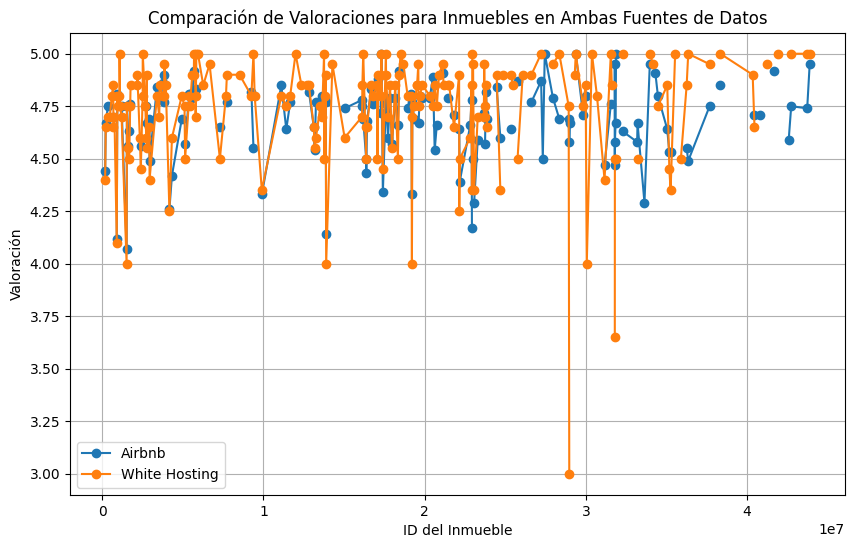

Plataforma  Airbnb  White Hosting
ID                               
178456        4.44           4.40
214970        4.67           4.65
352772        4.75           4.70
472062         NaN           4.70
590710         NaN           4.80
...            ...            ...
42580952      4.59            NaN
42736166      4.75           5.00
43728288      4.74           5.00
43882175      4.95           5.00
44545246       NaN            NaN

[212 rows x 2 columns]


In [190]:
#Identificamos los inmuebles que están en ambas fuentes de datos
inmuebles_duplicados = df_valoraciones[df_valoraciones.duplicated('ID', keep=False)]

#Comparamos valoraciones
inmuebles_comparacion = inmuebles_duplicados.pivot(index='ID', columns='Plataforma', values='Valoración')

#Creamos un grafico de plot para visualisarlo
plt.figure(figsize=(10, 6))
plt.plot(inmuebles_comparacion, marker='o')
plt.title('Comparación de Valoraciones para Inmuebles en Ambas Fuentes de Datos')
plt.xlabel('ID del Inmueble')
plt.ylabel('Valoración')
plt.legend(inmuebles_comparacion.columns)
plt.grid(True)
plt.show()

#Mostramos los resultados
print(inmuebles_comparacion)

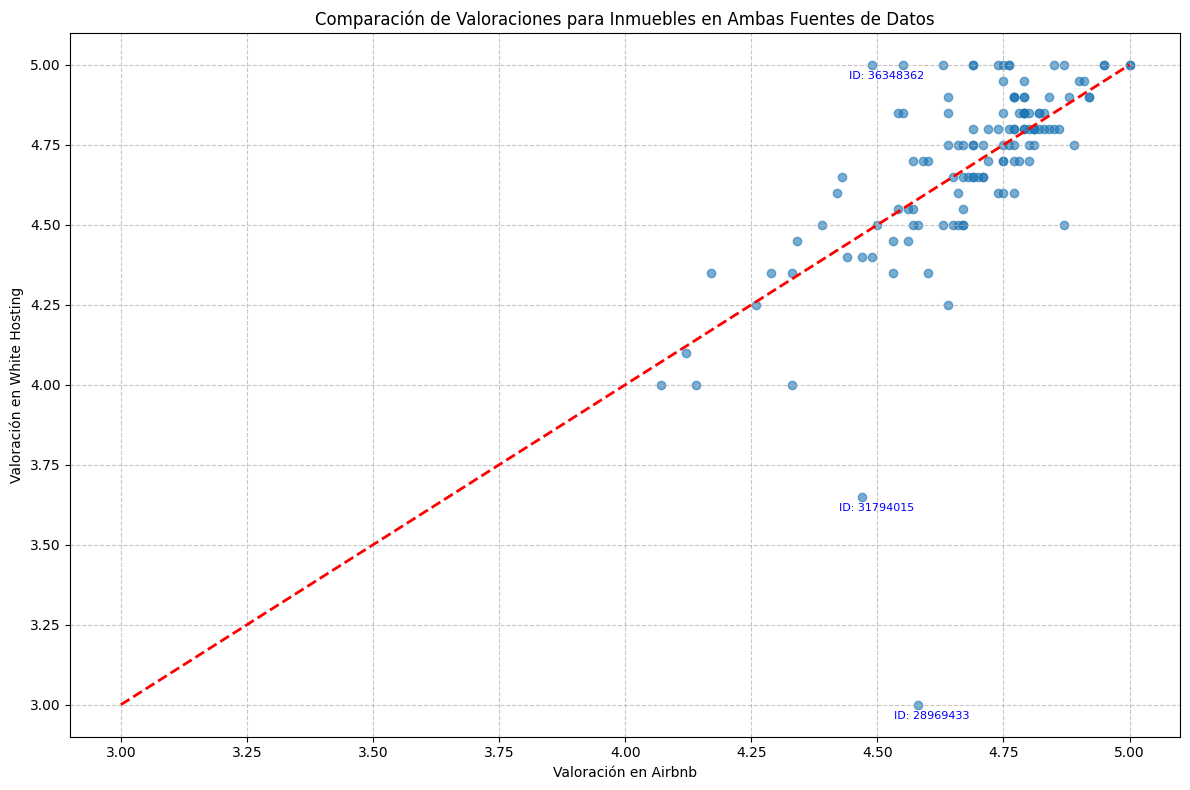

IDs anotados en el gráfico:
[28969433, 31794015, 36348362]


In [191]:
#Intentamos visualisar mejor para sacar conclusiones
#Visualización con scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(inmuebles_comparacion['Airbnb'], inmuebles_comparacion['White Hosting'], alpha=0.6)

#Añadimos una línea de identidad (donde Airbnb = White Hosting)
min_valor = min(inmuebles_comparacion.min())
max_valor = max(inmuebles_comparacion.max())
plt.plot([min_valor, max_valor], [min_valor, max_valor], 'r--', linewidth=2)

#Añadimos etiquetas y título
plt.xlabel('Valoración en Airbnb')
plt.ylabel('Valoración en White Hosting')
plt.title('Comparación de Valoraciones para Inmuebles en Ambas Fuentes de Datos')
plt.grid(True, linestyle='--', alpha=0.7)

#Añadimos anotaciones para puntos que están lejos de la línea de identidad
ids_anotados = []
for i in inmuebles_comparacion.index:
    airbnb_val = inmuebles_comparacion.at[i, 'Airbnb']
    wh_val = inmuebles_comparacion.at[i, 'White Hosting']
    if abs(airbnb_val - wh_val) > 0.5:  #umbral para anotaciones
        plt.annotate(f'ID: {i}', (airbnb_val, wh_val), textcoords="offset points", xytext=(10,-10), ha='center', fontsize=8, color='blue')
        ids_anotados.append(i)

plt.tight_layout()
plt.show()

#Los IDs anotados
print("IDs anotados en el gráfico:")
print(ids_anotados)

La línea de identidad indica dónde las valoraciones de Airbnb y White Hosting son iguales. Los puntos cercanos a esta línea tienen valoraciones similares en ambas plataformas. Además, hemos añadido anotaciones para los puntos que están significativamente lejos de la línea de identidad (diferencia de más de 0.5 en las valoraciones). Esto destaca los inmuebles con valoraciones significativamente diferentes en las dos plataformas. Este enfoque mejora la comprensión del gráfico cuando hay muchos IDs únicos, facilitando la comparación visual de las valoraciones entre las dos plataformas.

In [192]:
#Filtramos el DataFrame original para ver los detalles de los IDs anotados
df_anotados = df_valoraciones[df_valoraciones['ID'].isin(ids_anotados)]
df_anotados_ordenado = df_anotados.sort_values(by='ID')
df_anotados_ordenado.head(6)

,ID,Tipo de habitación,Ciudad,Precio,Valoración,Baños,Camas,Viajeros máximos,Fecha,Plataforma,Numero valoraciones
6629,28969433,Alojamiento entero,Madrid,27.0,3.00,1,1.0,2.0,2018-11-07,White Hosting,NaN
10594,28969433,Habitación,Madrid,30.0,4.58,1,1.0,NaN,2024,Airbnb,12.0
1155,31794015,Alojamiento entero,Valencia,50.0,3.65,1,2.0,4.0,2019-09-30,White Hosting,NaN
18985,31794015,Alojamiento entero,Valencia,280.0,4.47,1,2.0,4.0,2024,Airbnb,17.0
3690,36348362,Alojamiento entero,Valencia,35.0,5.00,1,2.0,3.0,2021-02-20,White Hosting,NaN
18498,36348362,Alojamiento entero,Valencia,NaN,4.49,1,2.0,3.0,2024,Airbnb,82.0


XXX ***Conclusión final respondiendo la pregunta 5*** XXX

La mayoría de los puntos se agrupan cerca de la línea de identidad (línea roja punteada), lo que indica que las valoraciones en ambas plataformas son similares para muchos inmuebles.
Sin embargo, hay algunos inmuebles con diferencias notables en las valoraciones entre las dos plataformas, que son los que han sido anotados en el gráfico. Los inmuebles con diferencias significativas (más de 0.5 en la valoración) han sido anotados en el gráfico. Estos inmuebles tienen IDs: 28969433, 31794015, y 36348362.

**En resumen**, la mayoría de los inmuebles tienen valoraciones similares en ambas plataformas, pero algunos inmuebles tienen diferencias notables en valoraciones entre Airbnb y White Hosting.

Analizando los datos de estos inmuebles anotados:

ID: 28969433:
- White Hosting: 3.00
- Airbnb: 4.58

ID: 31794015:
- White Hosting: 3.65
- Airbnb: 4.47

ID: 36348362:
- White Hosting: 5.00
- Airbnb: 4.49

Los ID´s 28969433 y 31794015 muestran una diferencia positiva significativa entre las valoraciones de White Hosting y Airbnb, con valoraciones más altas en Airbnb en el año actual comparado los años anteriores.
El ID 36348362 muestra una diferencia inferior, con una valoración ligeramente mayor en White Hosting comparado con Airbnb.

## <font color='orange'> 6. ¿En qué fuentes de datos hay más volatilidad en cuanto al precio?, ¿Hay algún tipo de estacionalidad?

Analizaremos los precios/mes en el df WhiteHosting y los precios/temporada en el df Airbnb y añadiremos un analisis del precio/año con el df Unido.

<font color='orange'> **1)Precio/Mes df WhiteHosting**

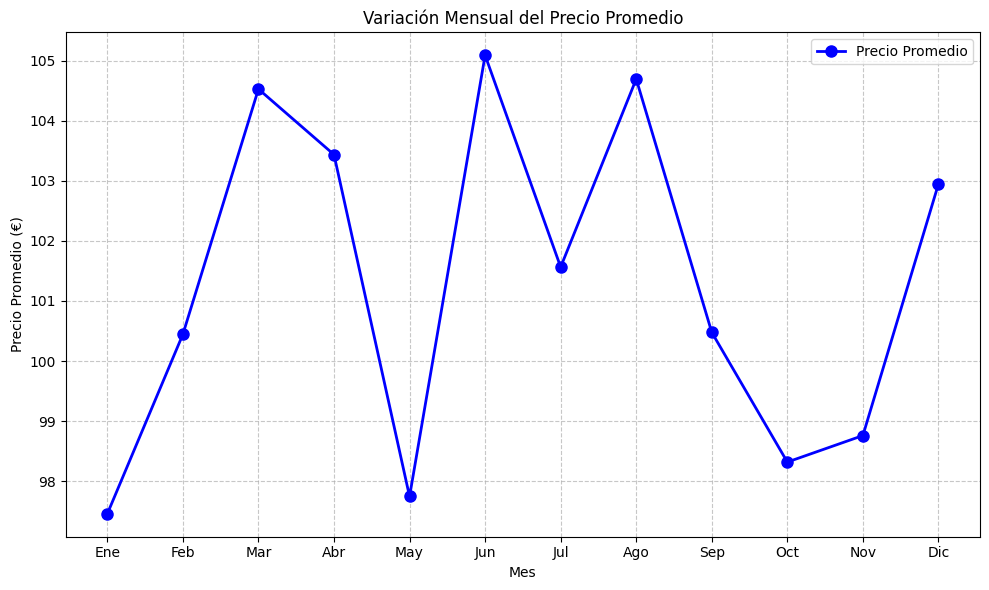

In [193]:
#Aseguramos de que la columna Precio sea numérica
df_wh['Precio'] = pd.to_numeric(df_wh['Precio'], errors='coerce')

#Análisamos la estacionalidad agrupando por mes
df_wh['Fecha_inserción'] = pd.to_datetime(df_wh['Fecha_inserción'])
df_wh['Mes'] = df_wh['Fecha_inserción'].dt.month

precios_mes = df_wh.groupby('Mes')['Precio'].mean()

#Creamos un grafico para visualizarlo
plt.figure(figsize=(10, 6))
plt.plot(precios_mes.index, precios_mes.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8, label='Precio Promedio')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio (€)')
plt.title('Variación Mensual del Precio Promedio')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

*Conclusión WhiteHosting* 

**Estacionalidad en los Precios**
- Los precios son más altos durante los meses de verano, en junio y agosto, así como en los meses de festividades más esperadas como Semana Santa en marzo-abril y Navidad en diciembre. En contraste, los precios son más bajos en enero, octubre y noviembre, coincidiendo con la temporada baja de invierno. Nos llama la atención que el precio promedio en mayo también parece ser económico según los datos de nuestro conjunto de datos. Para entender este factor, necesitamos un análisis más profundo.

**En resumen**, podemos deducir que los precios tienden a subir en las temporadas altas de turismo, mientras que descienden en la temporada baja. Observamos una gran volatilidad de precios en nuestro conjunto de datos y confirmamos la existencia de estacionalidad.

<font color='orange'> **2)Precio/Temporada df Airbnb (temporada alta = Agosto, temporada baja = Octubre)**

In [194]:
#Calculamos la desviación estándar de los precios en agosto y octubre
std_agosto = df_airbnb['Precio por noche Agosto'].std()
std_octubre = df_airbnb['Precio por noche Octubre'].std()

print(f"Desviación estándar de precios en agosto: {std_agosto}")
print(f"Desviación estándar de precios en octubre: {std_octubre}")

Desviación estándar de precios en agosto: 139.48839496066554
Desviación estándar de precios en octubre: 218.132151780205


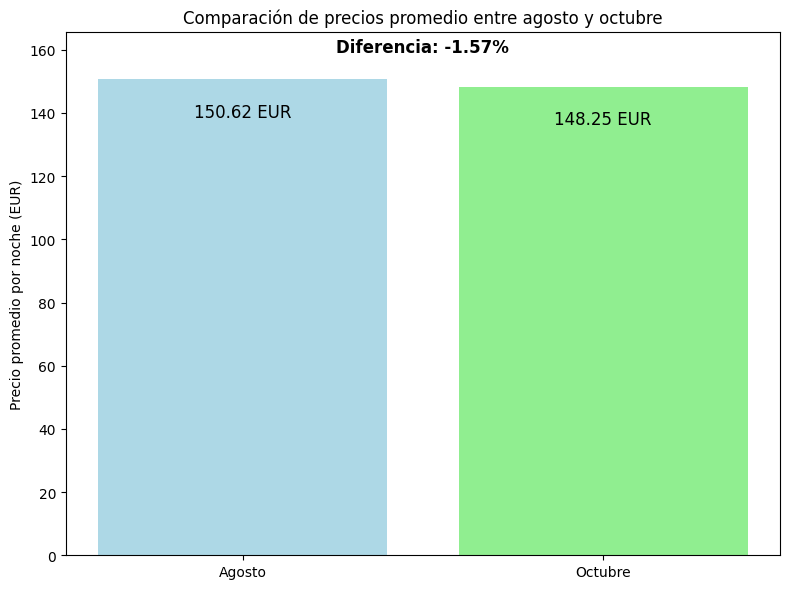

In [195]:
# Calcular los precios promedio en agosto y octubre
mean_agosto = df_airbnb['Precio por noche Agosto'].mean()
mean_octubre = df_airbnb['Precio por noche Octubre'].mean()

# Calcular la diferencia porcentual
diff_pct = (mean_octubre - mean_agosto) / mean_agosto * 100

# Crear un gráfico de barras
meses = ['Agosto', 'Octubre']
precios_promedio = [mean_agosto, mean_octubre]

plt.figure(figsize=(8, 6))
bars = plt.bar(meses, precios_promedio, color=['lightblue', 'lightgreen'])
plt.title('Comparación de precios promedio entre agosto y octubre')
plt.ylabel('Precio promedio por noche (EUR)')
plt.ylim(0, max(precios_promedio) * 1.1)  #Ajustar para que no se tapen los textos
plt.text(0.5, max(precios_promedio) * 1.05, f'Diferencia: {diff_pct:.2f}%', ha='center', va='bottom', fontsize=12, weight='bold')

#Agregamos etiquetas
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval * 0.95, f'{yval:.2f} EUR', ha='center', va='top', fontsize=12)

plt.tight_layout()
plt.show()

*Conclusión Airbnb* 

**Volatilidad**
Basado en las desviaciones estándar, se puede concluir que los precios son más volátiles en octubre que en agosto.

**Estacionalidad**
Al analizar los datos de nuestro conjunto de datos de Airbnb, observamos que hay muy poca diferencia en el precio promedio entre los meses de agosto y octubre. Esto podría indicar que en los destinos que hemos analizado existe una demanda turística alta durante todas las temporadas y, básicamente, no hay estacionalidad. También queremos señalar que los precios pueden deberse a factores como las vacaciones familiares que coinciden en agosto y octubre. Sería beneficioso realizar un análisis más profundo de la diferencia de precios entre temporada alta y baja en diversos destinos para obtener conclusiones más sólidas.

**En resumen**, respondiendo a la pregunta, en el df de Airbnb, cual basa de 11.160 ofertas en 2024, cuales descargamos en marzo-abril de este mismo año, los precios entre agosto y octubre no indican estacionalidad, pero si que hay un variabilidad en los precios basado en las desviaciones estándares. Pensamos que eso se debe al que las meses mencionadas estén realmente cerca a la fecha actual. 

<font color='orange'> **3)Precio/Año df Unido (años: 2017, 2018, 2019, 2020, 2021, 2024)**

In [207]:
df1.head(3)

,ID,Título,Tipología,Ciudad,Localización,Precio,Valoración,Numero valoraciones,Baños,Camas,Viajeros máximos,Año,Plataforma
0,36187629,Alojamiento entero,Alojamiento,Valencia,"3.947.149,-3.346",90.0,5.0,NaN,2,3.0,4.0,2019,White Hosting
1,5388904,Habitación privada,Habitación,Barcelona,"4.138.353,215.388",100.0,4.0,NaN,1,1.0,1.0,2021,White Hosting
2,39982406,Alojamiento entero,Alojamiento,Madrid,"4.046.614,-380.948",220.0,NaN,NaN,3,8.0,10.0,2020,White Hosting


In [208]:
df1.dtypes

ID                       int64
Título                  object
Tipología               object
Ciudad                  object
Localización            object
Precio                 float64
Valoración             float64
Numero valoraciones    float64
Baños                    int64
Camas                  float64
Viajeros máximos       float64
Año                     object
Plataforma              object
dtype: object

In [210]:
df1['Año'] = df1['Año'].astype('str')

In [211]:
valores_unicos_año = np.sort(df1['Año'].unique())
valores_unicos_año

array(['2017', '2018', '2019', '2020', '2021', '2024'], dtype=object)

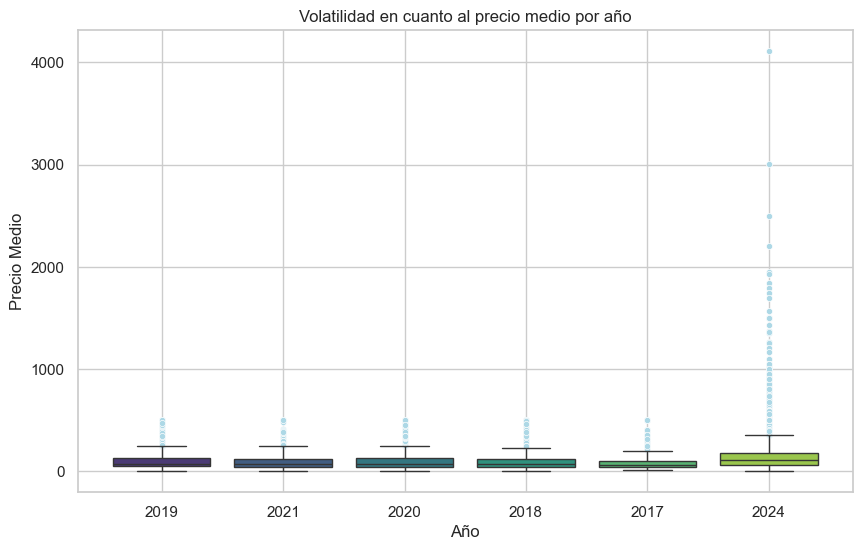

In [215]:
#Visualizamos la volatilidad Precio / Año
#Creamos un gráfico boxplot sin outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Año', y='Precio', hue='Año', palette='viridis', showfliers=False)

#Añadimos los outliers con scatterplot y configuramos tamaño para mejor visualizació
outliers = df1.groupby('Año')['Precio'].apply(lambda x: x[(x < x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25))) | (x > x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))])

for año in outliers.index.levels[0]:
    sns.scatterplot(x=[año]*len(outliers[año]), y=outliers[año], color='lightblue', s=20, edgecolor='w', linewidth=0.5)

plt.title('Volatilidad en cuanto al precio medio por año')
plt.xlabel('Año')
plt.ylabel('Precio Medio')
plt.grid(True)
plt.show()

Utilizaremos el gráfico de línea para mostrar la tendencia general de los precios medios a lo largo del tiempo, facilitando la identificación de tendencias ascendentes o descendentes.

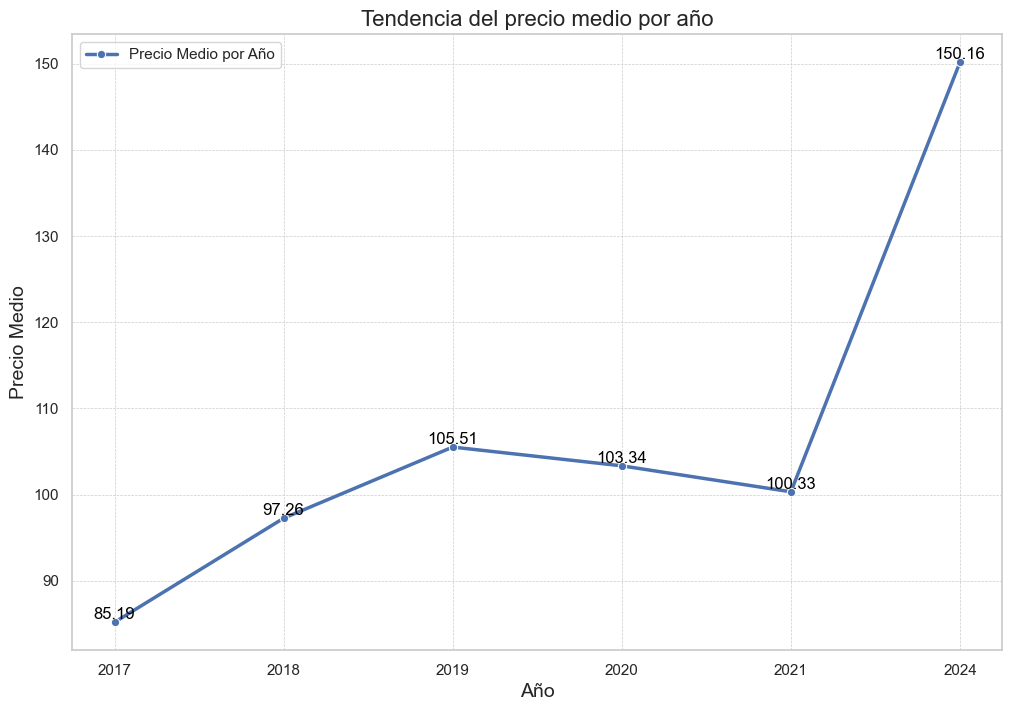

In [217]:
#Años:'2017', '2018', '2019', '2020', '2021', '2024'

#Agrupamos los datos por año y calculamos la media de los precios
precio_medio_año = df1.groupby('Año')['Precio'].mean().reset_index()

#Gráfico de línea para visualizar la tendencia de los precios medios por año
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
lineplot = sns.lineplot(data=precio_medio_año, x='Año', y='Precio', marker='o', linewidth=2.5)

#Añadimos etiquetas de datos en cada punto
for x, y in zip(precio_medio_año['Año'], precio_medio_año['Precio']):
    plt.text(x, y, f'{y:.2f}', color='black', ha="center", va="bottom")

plt.title('Tendencia del precio medio por año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Precio Medio', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5) #fondo de cuadrícula para mejor visualización
lineplot.legend(['Precio Medio por Año'])
plt.show()

Para manejar la falta de datos de los años 2022 y 2023 intentaremos hacer una estimación.

Queremos estimar los valores faltantes generando valores aproximados para los años 2022 y 2023 basándonos en los datos disponibles.

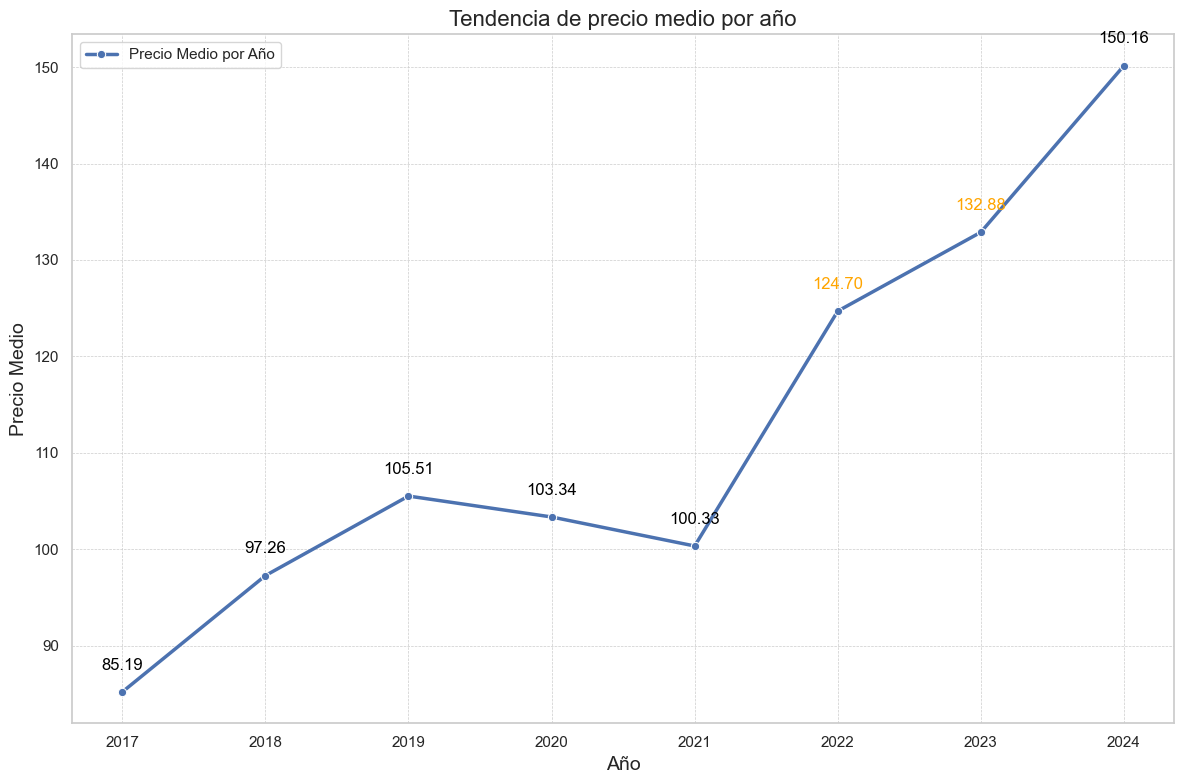

In [218]:
#Años:'2017', '2018', '2019', '2020', '2021', '2024' + Estimación de los años '2022' y '2023' 

from sklearn.linear_model import LinearRegression

#Datos
data = {
    'Año': ['2017', '2018', '2019', '2020', '2021', '2024'],
    'Precio': [85.19, 97.26, 105.51, 103.34, 100.33, 150.16]
}
df01 = pd.DataFrame(data)

#Agrupamos los datos por año y calculamos la media de los precios
precio_medio_año01 = df01.groupby('Año')['Precio'].mean().reset_index()

#Convertimos el año a valores numéricos para el modelo de regresión
precio_medio_año01['Año'] = precio_medio_año01['Año'].astype(int)

#Creamos el modelo de regresión lineal
X = precio_medio_año01[['Año']]
y = precio_medio_año01['Precio']
model = LinearRegression().fit(X, y)

#Predecir los valores para 2022 y 2023
años_a_predecir = pd.DataFrame({'Año': [2022, 2023]})
predicciones = model.predict(años_a_predecir)

#Añadimos las predicciones al dataframe
df_predicciones = pd.DataFrame({'Año': [2022, 2023], 'Precio': predicciones})
precio_medio_año01 = pd.concat([precio_medio_año01, df_predicciones]).sort_values(by='Año').reset_index(drop=True)

#Gráfico de línea para visualizar la tendencia de los precios medios por año
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

#Definimos los colores
colors = ['black' if año != 2022 and año != 2023 else 'orange' for año in precio_medio_año01['Año']]
lineplot = sns.lineplot(data=precio_medio_año01, x='Año', y='Precio', marker='o', linewidth=2.5)

#Añadimos etiquetas de datos en cada punto
for x, y, color in zip(precio_medio_año01['Año'], precio_medio_año01['Precio'], colors):
    plt.text(x, y + 2, f'{y:.2f}', color=color, ha="center", va="bottom")

plt.title('Tendencia de precio medio por año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Precio Medio', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5) # Fondo de cuadrícula para mejor visualización
lineplot.legend(['Precio Medio por Año'])

plt.tight_layout()  # Ajusta automáticamente la disposición
plt.show()


*Conclusión dataframe unido* 

**Volatilidad**
La volatilidad en los precios se refiere a la variabilidad o fluctuación de los precios a lo largo del tiempo. En el gráfico se observa un aumento desde 2017 hasta 2019, seguido de una disminución que sospechamos se debe a la pandemia. A partir de 2021, después de la pandemia, los precios comienzan a aumentar significativamente año tras año. Las mayores variaciones se observan entre 2021 y 2024, mostrando un incremento abrupto en los precios medios, lo cual indica una alta volatilidad en esos años.

**Estacionalidad**
- 2017 a 2021: Los precios muestran una tendencia relativamente estable con incrementos y decrementos moderados, sin un patrón estacional claro.
- 2021 a 2024: Se observa un incremento abrupto. Sin embargo, dado que los datos para 2022 y 2023 son estimaciones, es difícil concluir si hay una estacionalidad regular. Aun así, la tendencia general indica un aumento significativo en los precios.

**En resumen**, con base en la información disponible y el modelo de regresión lineal utilizado para predecir los precios de 2022 y 2023, se puede concluir que la mayor volatilidad se encuentra en los años recientes, especialmente entre 2021 y 2024 después de la pandemia.

XXX ***Conclusión final respondiendo la pregunta 6*** XXX

En el conjunto de datos original de WhiteHosting, se observa una alta volatilidad estacional, con precios que muestran variaciones significativas entre temporadas altas (como verano y festividades) y temporadas bajas (invierno). En contraste, los datos de Airbnb revelan una mayor volatilidad en octubre en comparación con agosto, aunque la diferencia en los precios promedio entre estos meses es mínima. Además, en general, los datos de Airbnb muestran menos evidencia de estacionalidad, indicando una demanda turística relativamente constante a lo largo del año en los destinos analizados. El dataframe unido presenta alta volatilidad reciente, especialmente entre 2021 y 2024, reflejando un aumento abrupto en los precios medios post-pandemia.

**¿En qué fuentes de datos hay más volatilidad en cuanto al precio?**
- WhiteHosting: Presenta la mayor volatilidad debido a grandes fluctuaciones estacionales.
- Airbnb: Menor volatilidad en comparación, con más variabilidad en octubre que en agosto.
- Dataframe unido: Alta volatilidad reciente, especialmente entre 2021 y 2024, post-pandemia. 

**¿Hay algún tipo de estacionalidad?**
- WhiteHosting: sí, los precios son más altos en verano y festividades, y más bajos en invierno.
- Airbnb: No hay una estacionalidad clara, la demanda es constante todo el año.
- Dataframe unido: No muestra un patrón estacional claro entre 2017 y 2021, pero hay un aumento significativo en los precios entre 2021 y 2024.

## <font color='orange'> 7. Crea un dataset único de verdad (unifica los 2 dataframes).

In [35]:
df_wh1 = df_wh.copy()
df_airbnb1 = df_airbnb.copy()

In [40]:
#Renombrar columnas en df WhiteHosting para que coincidan con las de Airbnb
df_wh1 = df_wh.rename(columns={
    'Tipo de habitación': 'Título',
    'Valoración total': 'Valoración',
    'Numero valoraciones': 'Numero valoracines',
})

#Renombrar columnas en df Airbnb
df_airbnb1 = df_airbnb.rename(columns={
    'Precio Medio': 'Precio',
    'Valoración total': 'Valoración',
})

#Creamos una nueva columna 'Localización' combinando 'Latitud' y 'Longitud' para WH
df_wh1['Localización'] = df_wh1['Latitud'].astype(str) + ',' + df_wh1['Longitud'].astype(str)

#Añadimos columna de Plataforma
df_wh1['Plataforma'] ='White Hosting'
df_airbnb1['Plataforma'] ='Airbnb'

#Añadimos columna de año
df_airbnb1['Año'] = '2024'
df_wh1['Año'] = df_wh1['Fecha_inserción'].str[:4]

#Eliminamos columnas que no coinciden
df_wh1.drop(columns=['ID_anfitrion', 'Nombre del título', 'Descripción',
       'Disponibilidad', 'Noches_minimas', 'Noches_maximas', 'Valoración precisión', 'Valoración limpieza',
       'Valoración checkin', 'Valoración comunicación', 'Valoración ubicación',
       'Valoración valor', 'Pais', 'Latitud', 'Longitud',
       'Fecha_inserción', 'Lista_amenidades'], inplace=True)
df_airbnb1.drop(columns=['Unnamed: 0', 'Tipo de habitación', 'Tipología', 'Municipio', 'Precio por noche Agosto', 'Precio por noche Octubre', 'Dormitorios','Distancia a PI'], inplace=True)

df_unido= pd.concat([df_wh1,df_airbnb1], axis=0, ignore_index=True)

#Creamos columna de Tipología
#Función para extraer la primera palabra
def extract_first_word(text):
    if pd.isna(text):
        return None
    return text.split()[0]

df_unido['Tipología'] = df_unido['Título'].apply(extract_first_word)

#Ordenamos las columnas
df_unido = df_unido[['ID', 'Título', 'Tipología', 'Ciudad', 'Localización', 'Precio', 'Valoración', 'Numero valoraciones', 'Baños', 'Camas', 'Viajeros máximos', 'Año', 'Plataforma']]


In [46]:
df_unido.head(2)

,ID,Título,Tipología,Ciudad,Localización,Precio,Valoración,Numero valoraciones,Baños,Camas,Viajeros máximos,Año,Plataforma
0,36187629,Alojamiento entero,Alojamiento,Valencia,"3.947.149,-3.346",90.0,5.0,NaN,2,3.0,4.0,2019,White Hosting
1,5388904,Habitación privada,Habitación,Barcelona,"4.138.353,215.388",100.0,4.0,NaN,1,1.0,1.0,2021,White Hosting


In [48]:
#Corregimos los tipos de datos
columnas_a_convertir1 = ['Precio', 'Numero valoraciones', 'Camas', 'Viajeros máximos']
df_unido[columnas_a_convertir1] = df_unido[columnas_a_convertir1].astype('Int64')

df_unido["ID"]=df_unido['ID'].astype(str).str.zfill(20)

In [52]:
#Comprobamos si hay valores fuera del rango 0-5 en la columna de Valoraciones
valoraciones_erroneas = df_unido[(df_unido['Valoración'] < 0) | (df_unido['Valoración'] > 5)]

print("Número total de valores fuera del rango 0-5:", valoraciones_erroneas.shape[0])

Número total de valores fuera del rango 0-5: 0


In [53]:
df_unido.to_csv("Dataset unido.csv", index=False)

## <font color='orange'> 8. ¿Hay alguna variable que podríamos añadir para mejorar el analísis?
Hemos añadido una variable que demuestra la distancia entre puntos de interés de cada ciudad en nuestro dataset de Airbnb. Pensamos que la ubicación exacta puede influir en el precio.

In [219]:
df_airbnb2 = pd.read_csv("C:\\Users\\Usuario\\OneDrive\\Documentos\\GitHub\\WhiteHosting\\CSVs\\CSV Finales\\Airbnb Unido.csv")

In [220]:
df_distancia = df_airbnb2.copy()

In [221]:
#Eliminación de columnas no nesesarrias
df_distancia.drop(columns=['Unnamed: 0', 'Tipo de habitación', 'Título'], inplace=True)

In [222]:
df_distancia.head(3)

,ID,Tipología,Ciudad,Localización,Municipio,Precio por noche Agosto,Precio por noche Octubre,Precio Medio,Valoración,Numero valoraciones,Dormitorios,Baños,Camas,Viajeros máximos,Distancia a PI
0,3586833,Habitación,Madrid,"40.42813,-3.64537",Madrid,26.0,NaN,26.0,NaN,NaN,1.0,1,1.0,NaN,5.079
1,1138900553049093343,Habitación,Madrid,"40.409064,-3.728734",Madrid,54.0,54.0,54.0,NaN,NaN,1.0,1,1.0,NaN,2.306
2,813055075285618470,Alojamiento,Madrid,"40.363582,-3.589946",Madrid,NaN,96.0,96.0,4.8,15.0,1.0,1,2.0,2.0,11.302


In [223]:
df_distancia.dtypes

ID                            int64
Tipología                    object
Ciudad                       object
Localización                 object
Municipio                    object
Precio por noche Agosto     float64
Precio por noche Octubre    float64
Precio Medio                float64
Valoración                  float64
Numero valoraciones         float64
Dormitorios                 float64
Baños                         int64
Camas                       float64
Viajeros máximos            float64
Distancia a PI              float64
dtype: object

In [228]:
#Cambiamos el tipo de dato a número entero de las columnas de precios, "Numero valoraciones", "Dormitorios", "Camas" y "Viajeros máximos".
columnas_a_convertir = ['Precio por noche Agosto', 'Precio por noche Octubre', 
                      'Precio Medio', 'Numero valoraciones', 'Dormitorios', 
                      'Camas', 'Viajeros máximos']

df_airbnb[columnas_a_convertir] = df_airbnb[columnas_a_convertir].astype('Int64')

#Convertimos la columna 'ID' a tipo 'object'
df_airbnb['ID'] = df_airbnb['ID'].astype(object)

<font color='orange'> **1) Conocemos los datos de la columna 'Distancia a PI'**

In [224]:
#Convertimos la columna a tipo numéricos
df_distancia['Distancia a PI'] = pd.to_numeric(df_distancia['Distancia a PI'], errors='coerce')

#Contar los valores NaN
nan_count = df_distancia['Distancia a PI'].isna().sum()
#Contar los valores infinitos (inf)
inf_count = np.isinf(df_distancia['Distancia a PI']).sum()
#Contar los valores float (finitos)
float_count = np.isfinite(df_distancia['Distancia a PI']).sum()

print(f"Valores NaN: {nan_count}")
print(f"Valores infinitos (inf): {inf_count}")
print(f"Valores float (finitos): {float_count}")

Valores NaN: 0
Valores infinitos (inf): 1523
Valores float (finitos): 9637


In [ ]:
#Filtramos y mostramos los valores infinitos
inf_values = df_distancia[df_distancia['Distancia a PI'] == np.inf]
inf_values.head(20)

In [226]:
#Decidimos eliminar las filas con valores infinitos, ya que de esta forma no podemos utilizarlos en el análisis.
df_distancia = df_distancia[~df_distancia['Distancia a PI'].isin([np.inf, -np.inf])]

#Verificamos que se hayan eliminado correctamente
nan_count = df_distancia['Distancia a PI'].isna().sum()
inf_count = np.isinf(df_distancia['Distancia a PI']).sum()
float_count = np.isfinite(df_distancia['Distancia a PI']).sum()

print(f"Valores NaN después de eliminación: {nan_count}")
print(f"Valores infinitos (inf) después de eliminación: {inf_count}")
print(f"Valores float (finitos): {float_count}")

Valores NaN después de eliminación: 0
Valores infinitos (inf) después de eliminación: 0
Valores float (finitos): 9637


In [227]:
#Convertimos la columna 'Distancia a PI' a tipo int para facilitar el análisis
df_distancia['Distancia a PI'] = df_distancia['Distancia a PI'].astype(int)

<font color='orange'> **2) Analisamos la correlación entre distancia y precio**

In [229]:
#'Distancia a PI' y 'Precio por noche Agosto'
correlation_agosto = df_distancia['Distancia a PI'].corr(df_distancia['Precio por noche Agosto'])

#'Distancia a PI' y 'Precio por noche Octubre'
correlation_octubre = df_distancia['Distancia a PI'].corr(df_distancia['Precio por noche Octubre'])

print(f"Correlación con Precio por noche Agosto: {correlation_agosto}")
print(f"Correlación con Precio por noche Octubre: {correlation_octubre}")


Correlación con Precio por noche Agosto: -0.23477876655752977
Correlación con Precio por noche Octubre: -0.08976366170909907


*El calculo no demuestra una correlación positiva, visualisamos la relación entre los precios en Agosto y la distancia cual tiene una correlación relativamente mayor.*

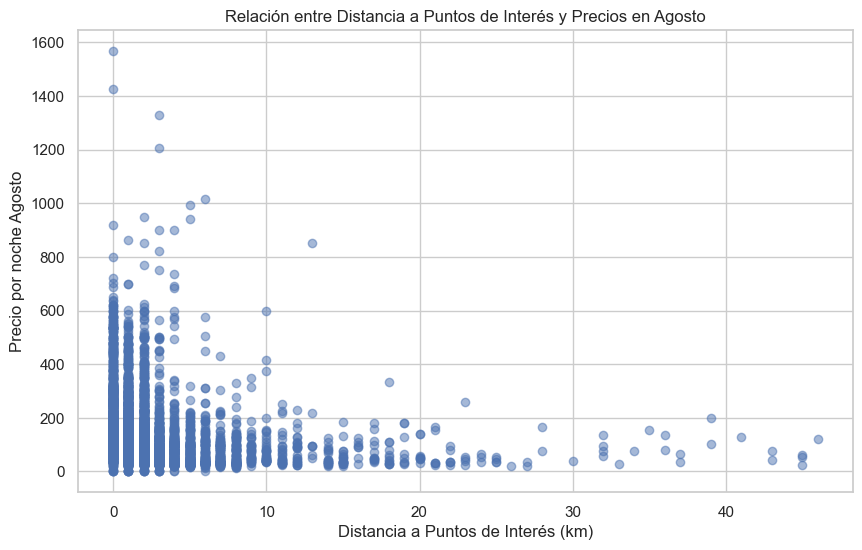

Las 5 casas más caras en agosto son:
   Precio por noche Agosto  Distancia a PI     Ciudad    Tipología
1                   1567.0               0  Barcelona  Alojamiento
2                   1425.0               0   Valencia  Alojamiento
3                   1330.0               3   Asturias  Alojamiento
4                   1206.0               3  Barcelona  Alojamiento
5                   1015.0               6     Madrid  Alojamiento


In [230]:
#Filtramos solo las filas donde no hay NaN
df_filtered = df_distancia.dropna(subset=['Precio por noche Agosto', 'Distancia a PI'])

#Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Distancia a PI'], df_filtered['Precio por noche Agosto'], alpha=0.5)
plt.title('Relación entre Distancia a Puntos de Interés y Precios en Agosto')
plt.xlabel('Distancia a Puntos de Interés (km)')
plt.ylabel('Precio por noche Agosto')
plt.grid(True)
plt.show()

#Mostramos las 5 casas más caras para analisarlos con más detalle
top_5_casas = df_filtered.nlargest(5, 'Precio por noche Agosto')
print("Las 5 casas más caras en agosto son:")
top_5_casas.index = range(1, 6)
print(top_5_casas[['Precio por noche Agosto', 'Distancia a PI', 'Ciudad', 'Tipología']])

<font color='orange'> **3) Analizamos los datos por ciudad**

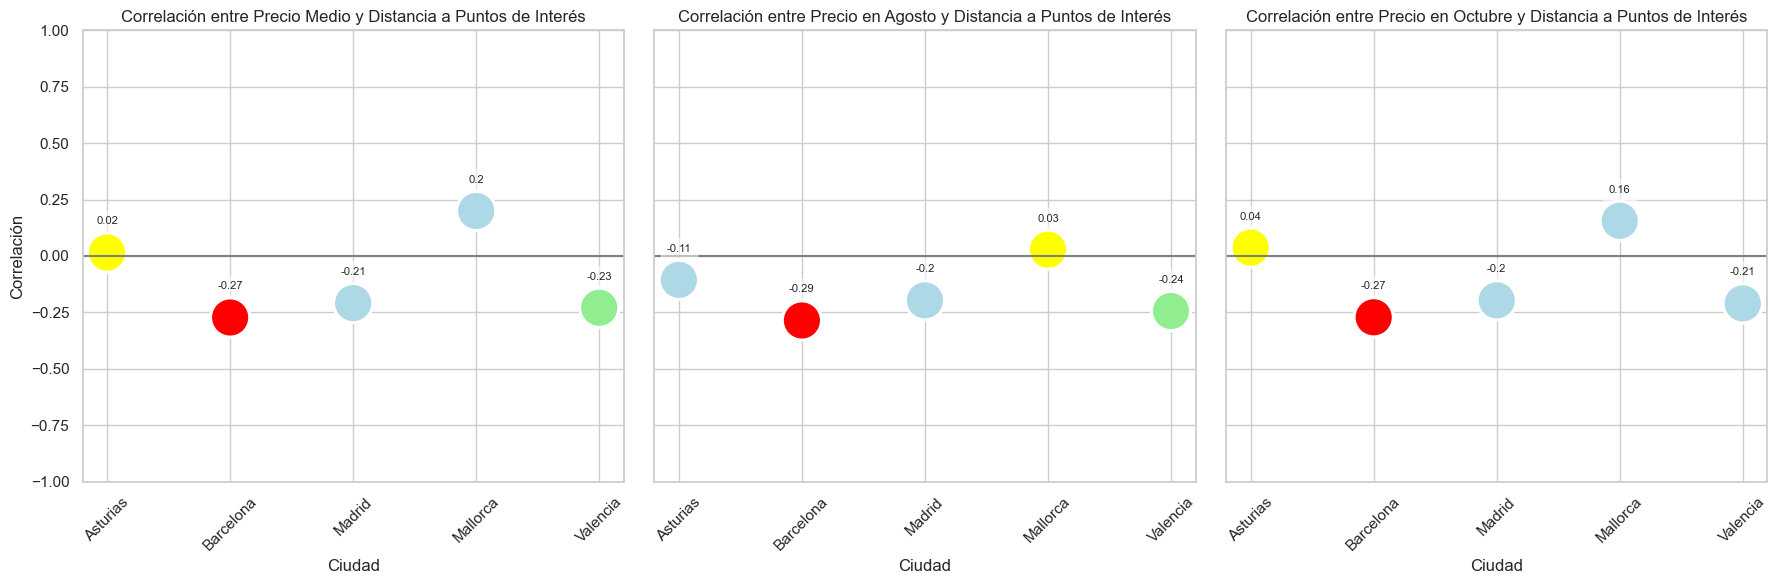

In [231]:
#Extraemos las columnas relevantes y eliminamos filas con NaN para los tres estudios: Precio Medio / Precio por noche Agosto / Precio por noche Octubre
df_estudio3 = df_distancia[['Ciudad', 'Precio Medio', 'Distancia a PI']].dropna()
df_estudio3_aug = df_distancia[['Ciudad', 'Precio por noche Agosto', 'Distancia a PI']].dropna()
df_estudio3_oct = df_distancia[['Ciudad', 'Precio por noche Octubre', 'Distancia a PI']].dropna()

#Calculamos las correlaciones por ciudad
corr_precio = df_estudio3.groupby('Ciudad').corr().iloc[0::2, -1].reset_index()
corr_aug = df_estudio3_aug.groupby('Ciudad').corr().iloc[0::2, -1].reset_index()
corr_oct = df_estudio3_oct.groupby('Ciudad').corr().iloc[0::2, -1].reset_index()

#Definimos las palettas de colores personalizadas según las ciudades para los tres estudios (asignado después de ver el gráfico midiendo la correlación)
paletta_estudio3 = {'Asturias': 'yellow', 'Madrid': 'lightblue', 'Mallorca': 'lightblue', 'Valencia': 'lightgreen', 'Barcelona': 'red'}
paletta_estudio3_aug = {'Asturias': 'lightblue', 'Madrid': 'lightblue', 'Mallorca': 'yellow', 'Valencia': 'lightgreen', 'Barcelona': 'red'}
palette_estudio3_oct = {'Asturias': 'yellow', 'Madrid': 'lightblue', 'Mallorca': 'lightblue', 'Valencia': 'lightblue', 'Barcelona': 'red'}

#Visualisamos con tres subplots uno al lado del otro
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

#Gráfico para Precio Medio
sns.scatterplot(data=corr_precio, x='Ciudad', y='Distancia a PI', hue='Ciudad', palette=paletta_estudio3, size='Distancia a PI', sizes=(800, 800), legend=None, ax=axes[0])
axes[0].set_xlabel('Ciudad')
axes[0].set_ylabel('Correlación')
axes[0].set_title('Correlación entre Precio Medio y Distancia a Puntos de Interés')
axes[0].set_xticks(range(len(corr_precio['Ciudad'].unique())))
axes[0].set_xticklabels(corr_precio['Ciudad'].unique(), rotation=45)
axes[0].set_ylim(-1.0, 1.0)   #Establecer el rango de valores en el eje y para que sea bien visible la correlación
axes[0].axhline(y=0, color='gray', linestyle='-')   #Añadir línea en el medio del gráfico
for i, row in corr_precio.iterrows():
    axes[0].text(row['Ciudad'], row['Distancia a PI'] + 0.16, round(row['Distancia a PI'], 2), ha='center', va='top', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

#Gráfico para Precio por noche en Agosto
sns.scatterplot(data=corr_aug, x='Ciudad', y='Distancia a PI', hue='Ciudad', palette=paletta_estudio3_aug, size='Distancia a PI', sizes=(800, 800), legend=None, ax=axes[1])
axes[1].set_xlabel('Ciudad')
axes[1].set_title('Correlación entre Precio en Agosto y Distancia a Puntos de Interés')
axes[1].set_xticks(range(len(corr_aug['Ciudad'].unique())))
axes[1].set_xticklabels(corr_aug['Ciudad'].unique(), rotation=45)
axes[1].axhline(y=0, color='gray', linestyle='-')
for i, row in corr_aug.iterrows():
    axes[1].text(row['Ciudad'], row['Distancia a PI'] + 0.16, round(row['Distancia a PI'], 2), ha='center', va='top', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

#Gráfico para Precio por noche en Octubre
sns.scatterplot(data=corr_oct, x='Ciudad', y='Distancia a PI', hue='Ciudad', palette=palette_estudio3_oct, size='Distancia a PI', sizes=(800, 800), legend=None, ax=axes[2])
axes[2].set_xlabel('Ciudad')
axes[2].set_title('Correlación entre Precio en Octubre y Distancia a Puntos de Interés')
axes[2].set_xticks(range(len(corr_oct['Ciudad'].unique())))
axes[2].set_xticklabels(corr_oct['Ciudad'].unique(), rotation=45)
axes[2].axhline(y=0, color='gray', linestyle='-')
for i, row in corr_oct.iterrows():
    axes[2].text(row['Ciudad'], row['Distancia a PI'] + 0.16, round(row['Distancia a PI'], 2), ha='center', va='top', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

<font color='orange'> **4) Correlación entre otros variables**

In [232]:
#Columnas númericos
columnas_num = ['Precio por noche Agosto', 'Precio por noche Octubre', 'Precio Medio', 'Valoración', 'Numero valoraciones', 'Dormitorios', 'Baños', 'Camas', 'Viajeros máximos', 'Distancia a PI']
corr = df_distancia[columnas_num].corr()

#Correlación con la columna 'Distancia a PI'
corr_distancia = corr['Distancia a PI'].sort_values(ascending=False)

print("\nCorrelación de las variables con 'Distancia a PI':")
print(corr_distancia)


Correlación de las variables con 'Distancia a PI':
Distancia a PI              1.000000
Valoración                  0.086189
Viajeros máximos           -0.014786
Baños                      -0.019576
Numero valoraciones        -0.058136
Camas                      -0.058739
Dormitorios                -0.064613
Precio por noche Octubre   -0.089764
Precio Medio               -0.137074
Precio por noche Agosto    -0.234779
Name: Distancia a PI, dtype: float64


In [233]:
#Calculamos la correlación entre 'Tipología' y distancia convertiendo la variable categórica en códigos numéricos.
#Correlación entre 'Distancia a PI' y 'Tipología'
corr_tipologia = df_distancia['Distancia a PI'].corr(df_distancia['Tipología'].astype('category').cat.codes)

print("\nCorrelación entre 'Distancia a PI' y 'Tipología':")
print(corr_tipologia)


Correlación entre 'Distancia a PI' y 'Tipología':
0.11176544902122851


XXX ***Conclusiones finales para responder la pregunta 8*** XXX

En este análisis, exploramos la relación entre la distancia a puntos de interés importantes, como una zona central de la costa o playa, el casco antiguo, o un sitio muy turístico, y el precio de los alojamientos. Nuestra hipótesis inicial era que habría una correlación positiva entre la proximidad a estos puntos y el precio. Sin embargo, los resultados indican que la relación entre el precio y la distancia es leve.

Enfocándonos en los precios durante agosto, observamos que las dos ofertas con los precios más altos están situadas a 0 km de los puntos de interés. Es evidente que, a partir de los 14 kilómetros, los alojamientos tienden a tener un precio estándar relativamente bajo y sin grandes variaciones. Además, la mayoría de las ofertas más caras se encuentran a menos de 6 kilómetros de estos puntos turísticos.

Al desglosar los datos por ciudad y precio, notamos que Barcelona presenta la mayor correlación entre distancia y precio. En contraste, en Asturias, la ubicación influye menos en el precio medio y en el precio de octubre. Un caso interesante es Mallorca, donde los precios en agosto parecen mantenerse estables independientemente de la ubicación, lo que refuerza la idea de una estabilidad de precios en la isla.

En resumen, aunque esperábamos demostrar que la ubicación es un factor determinante en los precios de los alojamientos u otros factores, encontramos en general una correlación débil. Sin embargo, al analizar específicamente los precios en agosto y la distancia, observamos un patrón interesante: los alojamientos cerca de los puntos de interés tienden a ser más costosos, especialmente a menos de 6 kilómetros.

## <font color='orange'> 9.¿Puedes hacer un ranking de los inmuebles más caros?

In [235]:
from tabulate import tabulate

In [234]:
df1.columns

Index(['ID', 'Título', 'Tipología', 'Ciudad', 'Localización', 'Precio',
       'Valoración', 'Numero valoraciones', 'Baños', 'Camas',
       'Viajeros máximos', 'Año', 'Plataforma'],
      dtype='object')

In [236]:
df1.head(2)

,ID,Título,Tipología,Ciudad,Localización,Precio,Valoración,Numero valoraciones,Baños,Camas,Viajeros máximos,Año,Plataforma
0,36187629,Alojamiento entero,Alojamiento,Valencia,"3.947.149,-3.346",90.0,5.0,NaN,2,3.0,4.0,2019,White Hosting
1,5388904,Habitación privada,Habitación,Barcelona,"4.138.353,215.388",100.0,4.0,NaN,1,1.0,1.0,2021,White Hosting


In [237]:
# Top 10 de 'Precio' en orden descendente de todo el DF Airbnb & White Hosting

from tabulate import tabulate
top_10_caros_total_desc = df1.sort_values(by='Precio', ascending=False).head(10)
top_10_caros_total_desc.reset_index(drop=True, inplace=True)
top_10_caros_total_desc['Índice'] = top_10_caros_total_desc.index
selected_columns = ['Índice', 'ID', 'Título', 'Ciudad', 'Precio', 'Valoración', 'Baños', 'Camas', 'Plataforma']
data = top_10_caros_total_desc[selected_columns]
table = data.values.tolist()
headers = data.columns.tolist()
print(tabulate(table, headers=headers, tablefmt='pretty'))

+--------+---------------------+--------------------+----------+--------+------------+-------+-------+------------+
| Índice |         ID          |       Título       |  Ciudad  | Precio | Valoración | Baños | Camas | Plataforma |
+--------+---------------------+--------------------+----------+--------+------------+-------+-------+------------+
|   0    | 944697025563542594  |       Barco        | Mallorca | 4110.0 |    nan     |   3   |  8.0  |   Airbnb   |
|   1    | 858420164570646690  | Alojamiento entero | Mallorca | 3003.0 |    nan     |   5   |  6.0  |   Airbnb   |
|   2    | 789667105290581546  | Alojamiento entero | Mallorca | 2502.0 |    nan     |   1   |  2.0  |   Airbnb   |
|   3    |      37356704       |       Barco        | Mallorca | 2200.0 |    nan     |   2   |  4.0  |   Airbnb   |
|   4    |      32381338       | Alojamiento entero | Mallorca | 1950.0 |    nan     |   5   |  4.0  |   Airbnb   |
|   5    | 627506622633425733  | Alojamiento entero | Valencia | 1933.0 

In [238]:
# Top 10 de 'Precio Medio' en orden descendente de todo el DF Airbnb & White Hosting
from tabulate import tabulate
top_10_caros_total_desc = df1.sort_values(by='Precio', ascending=False).head(10)
selected_columns = ['ID', 'Título', 'Ciudad', 'Precio', 'Valoración', 'Baños', 'Camas', 'Plataforma']
data = top_10_caros_total_desc[selected_columns]
table = data.values.tolist()
headers = data.columns.tolist()
print(tabulate(table, headers=headers, tablefmt='pretty'))

+---------------------+--------------------+----------+--------+------------+-------+-------+------------+
|         ID          |       Título       |  Ciudad  | Precio | Valoración | Baños | Camas | Plataforma |
+---------------------+--------------------+----------+--------+------------+-------+-------+------------+
| 944697025563542594  |       Barco        | Mallorca | 4110.0 |    nan     |   3   |  8.0  |   Airbnb   |
| 858420164570646690  | Alojamiento entero | Mallorca | 3003.0 |    nan     |   5   |  6.0  |   Airbnb   |
| 789667105290581546  | Alojamiento entero | Mallorca | 2502.0 |    nan     |   1   |  2.0  |   Airbnb   |
|      37356704       |       Barco        | Mallorca | 2200.0 |    nan     |   2   |  4.0  |   Airbnb   |
|      32381338       | Alojamiento entero | Mallorca | 1950.0 |    nan     |   5   |  4.0  |   Airbnb   |
| 627506622633425733  | Alojamiento entero | Valencia | 1933.0 |    4.75    |   1   |  2.0  |   Airbnb   |
|      31610874       | Alojamiento e

In [239]:
# Top 10 de 'Precio' en orden descendente de cada plataforma (DF Airbnb & White Hosting)
top_10_caros_por_plataforma_desc = df1.groupby('Plataforma').apply(lambda x: x.nlargest(10, 'Precio')).reset_index(drop=True)

print("\nTop 10 Inmuebles Más Caros por Plataforma - Orden Descendente:\n")
print(tabulate(top_10_caros_por_plataforma_desc[['ID', 'Título', 'Ciudad', 'Precio', 'Valoración', 'Baños', 'Camas', 'Plataforma']], headers='keys', tablefmt='pretty'))



Top 10 Inmuebles Más Caros por Plataforma - Orden Descendente:

+----+---------------------+--------------------+-----------+--------+--------------------+-------+-------+---------------+
|    |         ID          |       Título       |  Ciudad   | Precio |     Valoración     | Baños | Camas |  Plataforma   |
+----+---------------------+--------------------+-----------+--------+--------------------+-------+-------+---------------+
| 0  | 944697025563542594  |       Barco        | Mallorca  | 4110.0 |        nan         |   3   |  8.0  |    Airbnb     |
| 1  | 858420164570646690  | Alojamiento entero | Mallorca  | 3003.0 |        nan         |   5   |  6.0  |    Airbnb     |
| 2  | 789667105290581546  | Alojamiento entero | Mallorca  | 2502.0 |        nan         |   1   |  2.0  |    Airbnb     |
| 3  |      37356704       |       Barco        | Mallorca  | 2200.0 |        nan         |   2   |  4.0  |    Airbnb     |
| 4  |      32381338       | Alojamiento entero | Mallorca  | 1950.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16368\1021558768.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_caros_por_plataforma_desc = df1.groupby('Plataforma').apply(lambda x: x.nlargest(10, 'Precio')).reset_index(drop=True)


In [240]:
# Top 5 de 'Precio' en orden descendente de agrupados por 'Ciudad'

top_5_caros_por_ciudad_desc = df1.groupby('Ciudad').apply(lambda x: x.nlargest(5, 'Precio')).reset_index(drop=True)

print("\nTop 5 Inmuebles Más Caros por Ciudad - Orden Descendente:\n")
print(tabulate(top_5_caros_por_ciudad_desc[['ID', 'Título', 'Ciudad', 'Precio', 'Valoración', 'Baños', 'Camas', 'Plataforma']], headers='keys', tablefmt='pretty'))



Top 5 Inmuebles Más Caros por Ciudad - Orden Descendente:

+----+---------------------+--------------------+-----------+--------+--------------------+-------+-------+---------------+
|    |         ID          |       Título       |  Ciudad   | Precio |     Valoración     | Baños | Camas |  Plataforma   |
+----+---------------------+--------------------+-----------+--------+--------------------+-------+-------+---------------+
| 0  |      24037445       |    Alojamiento     | Asturias  | 1171.0 |        nan         |   1   |  8.0  |    Airbnb     |
| 1  | 1105644945651528984 |    Alojamiento     | Asturias  | 900.0  |        nan         |   1   |  2.0  |    Airbnb     |
| 2  |      27894294       |    Alojamiento     | Asturias  | 735.0  |        nan         |   1   |  6.0  |    Airbnb     |
| 3  | 1110683402754920807 |    Alojamiento     | Asturias  | 700.0  |        nan         |   1   |  1.0  |    Airbnb     |
| 4  | 596814016013311894  |    Alojamiento     | Asturias  | 683.0  |  

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16368\2252722361.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_caros_por_ciudad_desc = df1.groupby('Ciudad').apply(lambda x: x.nlargest(5, 'Precio')).reset_index(drop=True)


XXX **Análisis General pregunta 9.** XXX
1. Top 10 de 'Precio Medio' de Todo el DF Airbnb & White Hosting

Los inmuebles de Mallorca dominan los precios más altos con un 80% de las entradas en el Top 10. El precio más alto es un barco en Mallorca que cuesta 4110 euros. En comparación, el precio promedio de los inmuebles en este Top 10 es de 2428 euros, lo que resalta la alta demanda y los costos en esta región turística.

2. Top 10 de 'Precio Medio'de Cada Plataforma (Airbnb & White Hosting)

En Airbnb, el inmueble más caro es un barco en Mallorca con un precio de 4110 euros, seguido por varios alojamientos en la misma región. El precio promedio de los 10 inmuebles más caros en Airbnb es de 2428 euros, lo que indica una alta variabilidad en los precios dentro de la plataforma.

En contraste, White Hosting muestra un precio mucho más uniforme con todos los inmuebles del Top 10 costando 500 euros cada uno. Esto representa una diferencia del 79.4% en comparación con el precio promedio de Airbnb, lo que puede sugerir una estrategia de precios más accesible o menos oferta de lujo en White Hosting.

3. Top 5 de 'Precio Medio'agrupados por Ciudad

Asturias: El precio promedio de los inmuebles en el Top 5 es de 837.8 euros, con el más caro a 1171 euros y el más barato a 683 euros.

Barcelona: Los precios son notablemente altos con un promedio de 1209.2 euros. El inmueble más caro cuesta 1567 euros, reflejando la alta demanda en esta ciudad turística.

Girona: Los inmuebles tienen un precio constante de 500 euros, lo que puede indicar un mercado más estable o regulado.

Madrid: El precio promedio es de 659.6 euros, con el inmueble más caro a 1024 euros, destacando una variabilidad moderada en los precios.

Valencia: El precio promedio en el Top 5 es de 988.6 euros. El inmueble más caro tiene un precio de 1933 euros, lo que sugiere una alta demanda en ciertas áreas de la ciudad.

***Conclusiones**

Mallorca destaca como la ciudad con los inmuebles más caros, especialmente en Airbnb. Los precios en White Hosting son significativamente más bajos que en Airbnb, lo que puede indicar diferencias en el tipo de oferta o en la estrategia de precios de las plataformas. Barcelona y Valencia también tienen altos precios promedio, lo que refleja su popularidad como destinos turísticos. En general, las ciudades turísticas como Mallorca y Barcelona tienden a tener los precios más altos, mientras que ciudades como Girona muestran más estabilidad en los precios de los inmuebles.*

## <font color='orange'> 10. ¿Cuáles son los inmuebles más rentables?

In [241]:
df1.head(2)

,ID,Título,Tipología,Ciudad,Localización,Precio,Valoración,Numero valoraciones,Baños,Camas,Viajeros máximos,Año,Plataforma
0,36187629,Alojamiento entero,Alojamiento,Valencia,"3.947.149,-3.346",90.0,5.0,NaN,2,3.0,4.0,2019,White Hosting
1,5388904,Habitación privada,Habitación,Barcelona,"4.138.353,215.388",100.0,4.0,NaN,1,1.0,1.0,2021,White Hosting


In [242]:
#Verificamos si hay duplicados en la columna 'ID'
duplicated_ids = df1[df1['ID'].duplicated(keep=False)]

# Mostrar los IDs duplicados
print("IDs duplicados:")
print(duplicated_ids)

IDs duplicados:
             ID              Título    Tipología     Ciudad  \
27      3942375  Alojamiento entero  Alojamiento  Barcelona   
38     31844419               Hotel        Hotel   Mallorca   
119     4934110  Alojamiento entero  Alojamiento   Mallorca   
148     7297898  Alojamiento entero  Alojamiento   Mallorca   
225    35536688  Alojamiento entero  Alojamiento   Mallorca   
...         ...                 ...          ...        ...   
19162    899254  Alojamiento entero  Alojamiento   Valencia   
19170  17046209          Habitación   Habitación   Valencia   
19189  17405712  Alojamiento entero  Alojamiento   Valencia   
19244  33963952  Alojamiento entero  Alojamiento   Valencia   
19301  23726136  Alojamiento entero  Alojamiento   Valencia   

                                       Localización  Precio  Valoración  \
27      4.141.498.444.885.710,2.144.910.081.873.340   155.0        4.85   
38                                3.983.439,312.053   179.0        4.50   
11

In [243]:
#Eliminamos ID´s duplicados
df1.drop_duplicates(subset=['ID'])

df1.shape

(20810, 13)

***Rentabilidad:** Utilizamos el precio medio, la valoración y el número de valoraciones para calcular la rentabilidad de los alojamientos. La inclusión del logaritmo del número de valoraciones más 1 ayuda a equilibrar la influencia de las valoraciones, de manera que las propiedades con más valoraciones tengan un incremento en su rentabilidad, sin exagerar las diferencias entre propiedades con muchas y pocas valoraciones.*

*El precio medio representa los ingresos por noche, la valoración indica la calidad del inmueble según los huéspedes, y el número de valoraciones utilizamos para ajustar la fiabilidad de la valoración.*

In [244]:
#Calculamos la rentabilidad
df1['Rentabilidad'] = df1['Precio'] * df1['Valoración'] * np.log(df1['Numero valoraciones'] + 1)
df_rentabilidad = df1.sort_values(by='Rentabilidad', ascending=False)

rentabilidad = df_rentabilidad[['ID', 'Título', 'Ciudad', 'Precio', 'Valoración', 'Numero valoraciones', 'Rentabilidad']]
rentabilidad.head(10)

,ID,Título,Ciudad,Precio,Valoración,Numero valoraciones,Rentabilidad
18091,627506622633425733,Alojamiento entero,Valencia,1933.0,4.75,100.0,42374.882806
15055,50476381,Alojamiento entero,Barcelona,1368.0,4.75,83.0,28791.447559
14902,18918143,Alojamiento entero,Barcelona,1206.0,4.65,79.0,24573.967165
12808,31610874,Alojamiento entero,Mallorca,1844.0,4.36,11.0,19978.251879
16148,5323760,Alojamiento entero,Barcelona,629.0,4.81,338.0,17626.505065
16146,49106791,Alojamiento entero,Barcelona,765.0,4.85,110.0,17473.534429
16646,36717874,Alojamiento entero,Barcelona,642.0,4.83,279.0,17472.693689
16389,50319142,Alojamiento entero,Barcelona,650.0,4.77,166.0,15868.339815
16402,42030176,Alojamiento entero,Barcelona,750.0,4.87,76.0,15865.749303
15542,19958031,Alojamiento entero,Barcelona,534.0,4.54,690.0,15850.804663


XXX ***Conclusiones finales para responder la pregunta 10*** XXX

Basado a la métrica definida de calcular la rentabilidad, que considera tanto el precio medio por noche, la valoración de los huéspedes y el número de valoraciones recibidas; el inmueble más rentable se encuentra en Valencia.

La mayoría de los inmuebles más rentables se encuentran en Barcelona, indicando que es un mercado lucrativo para alquileres temporales debido a una alta demanda turística.

Los inmuebles con rentabilidades más altas tienen precios medios superiores a 1000 euros por noche, lo que posiblemente contribuye significativamente a su rentabilidad.

Todos los inmuebles en el top 10 tienen valoraciones superiores a 4.3, señalando una alta satisfacción de los huéspedes y la capacidad de mantener precios altos.

El número de valoraciones varía ampliamente, desde 11 hasta 690. Propiedades con un alto número de valoraciones como el ID 19958031 (690 valoraciones) muestran una fuerte confianza en su calidad, apoyando su alta rentabilidad incluso con precios medios relativamente bajos.

Para calcular la rentabilidad de manera más precisa y completa, sería ideal tener información detallada sobre los costes y los beneficios asociados a cada inmueble.

# **<font color='orange'> VI. Añadir valor**
Precios por codigo postal y m² en las ciudades.  Cálculo de rentabilidad más respaldado con esta nueva variable. 
- Año: 2024 
- Plataformas: Airbnb y de RealAdvisor (https://realadvisor.es/es)

<font color='orange'> **1) Preparación de datos**

In [251]:
df_precio_m2 = pd.read_csv("C:\\Users\\Usuario\\OneDrive\\Documentos\\GitHub\\WhiteHosting\\CSVs\\CSV Finales\\Precio m2 por ID.csv")
df_airbnb = pd.read_csv("C:\\Users\\Usuario\\OneDrive\\Documentos\\GitHub\\WhiteHosting\\CSVs\\CSV Finales\\Airbnb Unido.csv")

In [252]:
df_airbnb3 = pd.merge(df_airbnb, df_precio_m2, on='ID')

In [253]:
#Columnas especificadas para el análisis
df_estudio4 = df_airbnb3[['ID', 'Tipología', 'Ciudad', 'Precio por noche Agosto',
                          'Precio por noche Octubre', 'Precio Medio', 'Valoración', 'Numero valoraciones',
                          'Dormitorios', 'Baños', 'Camas', 'Viajeros máximos', 'Distancia a PI',
                          'CP', 'PRECIO POR PISO', 'PRECIO POR CASA']].copy()

In [254]:
df_estudio4.dtypes

ID                            int64
Tipología                    object
Ciudad                       object
Precio por noche Agosto     float64
Precio por noche Octubre    float64
Precio Medio                float64
Valoración                  float64
Numero valoraciones         float64
Dormitorios                 float64
Baños                         int64
Camas                       float64
Viajeros máximos            float64
Distancia a PI              float64
CP                            int64
PRECIO POR PISO              object
PRECIO POR CASA              object
dtype: object

In [255]:
#Convertimos las columnas 'PRECIO POR PISO' y 'PRECIO POR CASA' a tipo int
def convertir_a_entero(valor):
    try:
        #Eliminamos caracteres no numéricos
        return int(''.join(filter(str.isdigit, valor)))
    except ValueError:
        return None

df_estudio4['PRECIO POR PISO'] = df_estudio4['PRECIO POR PISO'].apply(convertir_a_entero)
df_estudio4['PRECIO POR CASA'] = df_estudio4['PRECIO POR CASA'].apply(convertir_a_entero)


In [256]:
#Creamos una nueva columna 'Precio m2' como el promedio de 'PRECIO POR PISO' y 'PRECIO POR CASA', este valor utilizaremos para el análisis ya que no sabemos si las ofertas son casas o pisos.
df_estudio4['Precio m2'] = ((df_estudio4['PRECIO POR PISO'] + df_estudio4['PRECIO POR CASA']) / 2).astype(int)

In [257]:
df_estudio4.head(2)

,ID,Tipología,Ciudad,Precio por noche Agosto,Precio por noche Octubre,Precio Medio,Valoración,Numero valoraciones,Dormitorios,Baños,Camas,Viajeros máximos,Distancia a PI,CP,PRECIO POR PISO,PRECIO POR CASA,Precio m2
0,3586833,Habitación,Madrid,26.0,NaN,26.0,NaN,NaN,1.0,1,1.0,NaN,5.079,28017,2962,3144,3053
1,1138900553049093343,Habitación,Madrid,54.0,54.0,54.0,NaN,NaN,1.0,1,1.0,NaN,2.306,28011,2936,2680,2808


In [258]:
#Comprobamos valores nulos en la columna 'Precio por m2'
valores_nulos = df_estudio4['Precio m2'].isnull().sum()

print("Cantidad de valores nulos en la columna 'Precio por m2':", valores_nulos)

Cantidad de valores nulos en la columna 'Precio por m2': 0


In [259]:
df_estudio4.shape #Base de analisis 8066 ID´s

(8066, 17)

<font color='orange'> **2) Rentabilidad Precio de alquiler/Precio m2**

In [260]:
#Calculamos la rentabilidad usando el precio medio por noche y el precio por m2
df_estudio4['Rentabilidad'] = df_estudio4['Precio Medio'] / df_estudio4['Precio m2']

#Ranking de los 10 IDs más rentables
df_estudio4.sort_values(by='Rentabilidad', ascending=False).head(10)

,ID,Tipología,Ciudad,Precio por noche Agosto,Precio por noche Octubre,Precio Medio,Valoración,Numero valoraciones,Dormitorios,Baños,Camas,Viajeros máximos,Distancia a PI,CP,PRECIO POR PISO,PRECIO POR CASA,Precio m2,Rentabilidad
7287,596814016013311894,Alojamiento,Asturias,683.0,683.0,683.0,4.75,4.0,5.0,1,6.0,1.0,4.356,33919,443,867,655,1.042748
7297,24037445,Alojamiento,Asturias,1330.0,1012.0,1171.0,NaN,NaN,6.0,1,8.0,NaN,3.109,33212,1744,982,1363,0.859134
5905,627506622633425733,Alojamiento,Valencia,NaN,1933.0,1933.0,4.75,100.0,1.0,1,2.0,3.0,0.651,46001,3013,2224,2618,0.738350
7056,1105644945651528984,Alojamiento,Asturias,NaN,900.0,900.0,NaN,NaN,2.0,1,2.0,4.0,4.060,33209,1787,1614,1700,0.529412
6877,4230255,Alojamiento,Valencia,NaN,950.0,950.0,NaN,NaN,2.0,1,3.0,4.0,0.550,46013,2208,1504,1856,0.511853
2645,36351121,Barco,Mallorca,2.0,2500.0,1251.0,NaN,NaN,2.0,5,2.0,4.0,2.850,7600,2896,2946,2921,0.428278
2838,49315507,Alojamiento,Mallorca,NaN,1500.0,1500.0,4.80,5.0,7.0,6,9.0,4.0,5.315,7150,3388,3929,3658,0.410060
2646,36351121,Barco,Mallorca,2.0,2500.0,1251.0,NaN,NaN,2.0,5,2.0,4.0,2.850,7600,2628,3630,3129,0.399808
3102,789667105290581546,Alojamiento,Mallorca,5.0,5000.0,2502.0,NaN,NaN,2.0,1,2.0,4.0,2.134,7181,5883,6714,6298,0.397269
3041,664188426486392762,Alojamiento,Mallorca,NaN,1745.0,1745.0,NaN,NaN,4.0,5,NaN,8.0,4.891,7179,4885,4543,4714,0.370174


In [261]:
#Agrupamos por ciudad y calculamos la rentabilidad media
rentabilidad_por_ciudad = df_estudio4.groupby('Ciudad')['Rentabilidad'].mean().reset_index()

#Ordenamos y agragamos un índice
rentabilidad_por_ciudad = rentabilidad_por_ciudad.sort_values(by='Rentabilidad', ascending=False)
rentabilidad_por_ciudad['Índice'] = range(1, len(rentabilidad_por_ciudad) + 1)
rentabilidad_por_ciudad = rentabilidad_por_ciudad[['Índice', 'Ciudad', 'Rentabilidad']]
rentabilidad_por_ciudad

,Índice,Ciudad,Rentabilidad
0,1,Asturias,0.070485
3,2,Mallorca,0.057642
4,3,Valencia,0.055996
1,4,Barcelona,0.049693
2,5,Madrid,0.025815


<font color='orange'> **3) Análisis Extra - Destinos más caros para comprar propiedades**

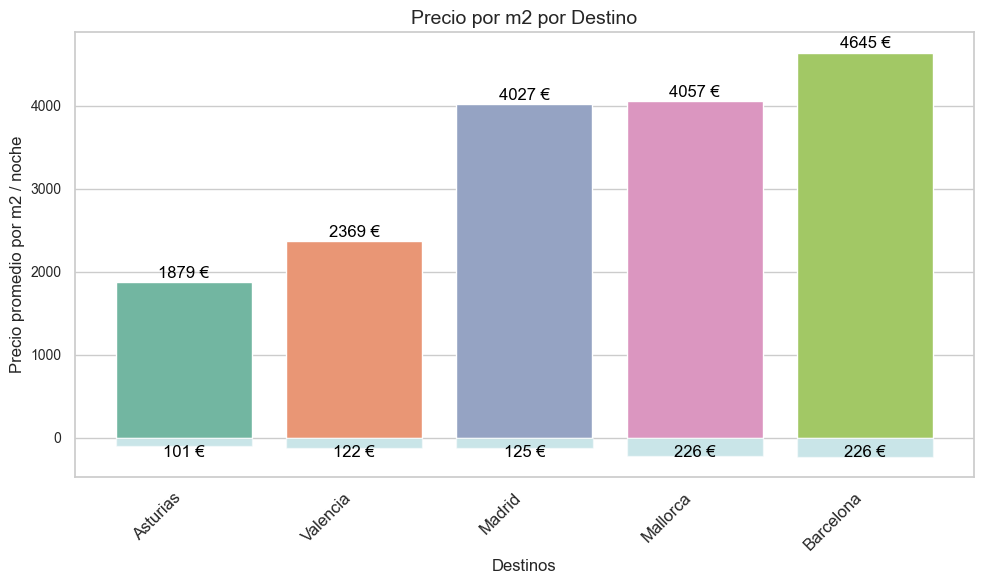

In [262]:
#Calculamos el precio promedio por m2 por ciudad
precio_promedio_m2_ciudad = df_estudio4.groupby('Ciudad')['Precio m2'].mean().sort_values()

#Calculamos el promedio del precio medio por ciudad
precio_alquiler_ciudad = df_estudio4.groupby('Ciudad')['Precio Medio'].mean().sort_values()

#Preparación de datos
data = precio_promedio_m2_ciudad.reset_index()
data['Precio Medio'] = precio_alquiler_ciudad.values

#Aseguramos que no haya valores NA
data = data.dropna()

#Visualizamos con gráfico de barra añadiendo información sobre el precio promedio de alquileres por noche por ciudad.
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Ciudad', y='Precio m2', data=data, palette='Set2', hue='Ciudad', dodge=False)

#Añadimos la barra hacia abajo para el precio medio
for index, row in data.iterrows():
    plt.bar(row['Ciudad'], -row['Precio Medio'], color='#95CCD2', alpha=0.5)

plt.title('Precio por m2 por Destino', fontsize=14)
plt.ylabel('Precio promedio por m2 / noche', fontsize=12)
plt.xlabel('Destinos', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=10)

#Agregamos etiquetas
for index, value in enumerate(precio_promedio_m2_ciudad.values):
    plt.text(index, value + 50, f'{value:.0f} €', ha='center', fontsize=12, color='black')

#Etiqueta para el precio medio
for index, row in data.iterrows():
    plt.text(index, -data['Precio Medio'].max(), f'{row["Precio Medio"]:.0f} €', ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()


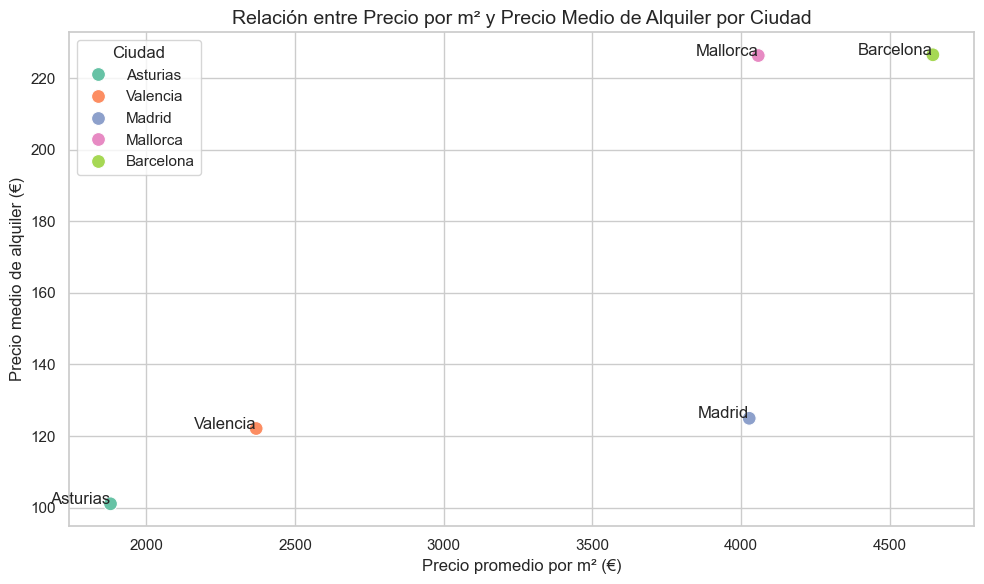

In [263]:
#Analisamos la relación entre precio por m2 y precio de alquiler
#Preparación de datos
data = precio_promedio_m2_ciudad.reset_index()
data['Precio Medio'] = precio_alquiler_ciudad.values
data = data.dropna()

#Visualizamos con gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Precio m2', y='Precio Medio', data=data, hue='Ciudad', palette='Set2', s=100)

#Etiquetas a los puntos
for index, row in data.iterrows():
    plt.text(row['Precio m2'], row['Precio Medio'], row['Ciudad'], fontsize=12, ha='right')

plt.title('Relación entre Precio por m² y Precio Medio de Alquiler por Ciudad', fontsize=14)
plt.xlabel('Precio promedio por m² (€)', fontsize=12)
plt.ylabel('Precio medio de alquiler (€)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



XXX ***Conclusiones valor añadido: Precio por m²*** XXX

Con este análisis, nuestro objetivo era verificar la hipótesis sobre la rentabilidad de los inmuebles y proporcionar recomendaciones basadas en datos detallados y diversos. Para calcular la rentabilidad, hemos empleado el precio promedio por noche (como ingreso) y el precio por metro cuadrado (como coste).

Al observar la rentabilidad en función del precio por m², encontramos diferencias al nuestro analisis en función de las valoraciones, dónde inicialmente parecía que Barcelona es uno de las ciudades más rentables. Sin embargo, al añadir el variable nuevo, encontramos que los alojamientos en Asturias muestran la mayor rentabilidad. Esto sugiere que, a pesar de tener un precio por metro cuadrado más bajo, los ingresos por alquiler en Asturias son relativamente altos en comparación con el coste de compra.

Además de Asturias, Mallorca y Valencia también aparecen en el top 10 de rentabilidad. Analizando las ciudades, confirmamos que la mayoría de los alquileres más rentables se encuentran en Asturias, seguida de Mallorca. Esto indica que estos mercados son lucrativos para alquileres temporales debido a una combinación favorable de precios de adquisición y altos ingresos por alquiler.

Los inmuebles con rentabilidades más altas, como los ubicados en Asturias, tienen precios por metro cuadrado significativamente más bajos que los de otros destinos, lo que contribuye significativamente a su alta rentabilidad. Mallorca, aunque tiene precios por metro cuadrado mucho más altos, muestra una menor rentabilidad en comparación con Asturias. Sin embargo, sigue siendo una opción viable debido a la alta demanda turística y los altos precios de alquiler.

Basado al análisis, Madrid tiene la peor rentabilidad, ya que sus precios por m² son casi iguales a los de Mallorca, pero el precio medio por noche es mucho inferior, acercándose más a los precios de Valencia. La compra de inmuebles más costosa en general, utilizando datos promedios, se encuentra en Barcelona, donde el precio por m² es el más alto, con 4645 EUR.

**En Resumen**: Asturias lidera en términos de rentabilidad, seguida por Mallorca y Valencia. Madrid y Barcelona, aunque son mercados relevantes, no muestran la misma rentabilidad debido a sus altos precios de compra.

# <font color='orange'> 11. ¿Teniendo en cuenta todo el conocimiento adquirido, cuales son tus sugerencias a la hora de invertir 300 millones de euros?

XXX ***Conclusiones finales para responder la pregunta 11*** XXX

**Recomendaciones para la Inversión de 300 Millones de Euros en Inmuebles Vacacionales en España**

**Distribución Recomendada de la Inversión**

    1.	Mallorca: 30% (90 millones de euros)

    2.	Asturias: 25% (75 millones de euros)

    3.	Valencia: 20% (60 millones de euros)

    4.	Barcelona: 15% (45 millones de euros)
    
    5.	Madrid: 10% (30 millones de euros)

..................

**Justificación de la Distribución Recomendada**



**1) Mallorca**

•   Porcentaje de Inversión: 30%

•	Justificación: Alta estabilidad y demanda en el mercado de lujo, lo que asegura un flujo constante de ingresos y una menor volatilidad en comparación con otros mercados. Su atractivo turístico proporciona una fuerte oportunidad de inversión.

•	Fundamentación Teórica(1): Basado en la teoría del precio de mercado y la teoría del valor añadido. Mallorca representa una inversión sólida debido a su alta demanda constante y estabilidad en el mercado de lujo, lo cual sugiere que los precios elevados reflejan una rentabilidad potencialmente alta y sostenible.

..................

**2) Asturias**

•	Porcentaje de Inversión: 25%

•	Justificación: Ofrece altas rentabilidades debido a los bajos precios de adquisición y buenos ingresos por alquiler, lo que compensa la menor demanda turística. Su menor competitividad permite mejores oportunidades de crecimiento a largo plazo.

•	Fundamentación Teórica(2): Aplicando la teoría del rendimiento ajustado al riesgo y el modelo GARCH. Asturias ofrece una oportunidad de alta rentabilidad a un costo de adquisición bajo, ideal para maximizar los retornos ajustados por el riesgo en un mercado menos saturado y con potencial de crecimiento.

..................

**3) Valencia**

•	Porcentaje de Inversión: 20%

•	Justificación: El crecimiento emergente de Valencia y su transformación urbana ofrecen oportunidades de capitalización en desarrollos inmobiliarios y comerciales, ideal para diversificar y aprovechar un mercado en expansión.

•	Fundamentación Teórica(3): La teoría de la gestión de riesgos regulatorios y la estacionalidad del mercado son pertinentes aquí. Valencia, como mercado emergente, muestra una tendencia de crecimiento y expansión, ofreciendo oportunidades con rentabilidades atractivas a un riesgo comparativamente menor.

..................

**4) Barcelona**

•	Porcentaje de Inversión: 15%

•	Justificación: Aunque es un mercado importante y con alta demanda, las regulaciones restrictivas(1.1) y la alta competencia justifican una inversión más cautelosa para mantener una presencia estratégica sin asumir riesgos excesivos.

•	Fundamentación Teórica(4)(5): En este caso, se aplican la teoría de diversificación de inversiones y el rendimiento ajustado al riesgo. A pesar de las restricciones regulatorias, la constante demanda y el mercado de alto nivel justifican una inversión significativa para captar rendimientos ajustados por el alto riesgo asociado con los precios elevados.

..................

**5) Madrid**

•	Porcentaje de Inversión: 10%

•	Justificación: Los altos precios de adquisición y la saturación del mercado hacen que Madrid requiera una asignación más conservadora. Sin embargo, su importancia como centro económico y cultural justifica mantener una presencia en el mercado.

•	Fundamentación Teórica(6): La teoría de competencia perfecta es relevante aquí. Madrid, como mercado altamente competitivo, sugiere que los precios reflejan eficientemente la información disponible, haciendo necesario una asignación conservadora debido a la alta competencia y los precios elevados que limitan las oportunidades de altos retornos rápidos.

*Esta distribución equilibrada permite aprovechar las ventajas específicas de cada región mientras se gestionan los riesgos asociados con cada mercado. Complementar estas recomendaciones con un análisis continuo del mercado y una revisión periódica de la estrategia de inversión ayudará a adaptarse a cambios y oportunidades emergentes.*

..................

**Sugerencias Adicionales**



**I.    Regulaciones y Cumplimiento Legal:**

•	Conocer bien las regulaciones locales en ciudades, pueden tener normativas estrictas sobre alquileres a corto plazo. La colaboración con asesores legales especializados es crucial para garantizar el cumplimiento y evitar problemas legales.

..................

**II.	Evaluación de la Competencia y el Mercado:**

•	Investigar con profundidad la oferta y demanda en las áreas donde se piensa invertir, identificando zonas con menor competencia y alta demanda turística o residencial para maximizar las oportunidades.

..................

**III.	Innovación en Servicios y Amenidades:**

•	Añadir valor mediante servicios adicionales como Wi-Fi, aire acondicionado y aparcamiento puede justificar precios más altos y atraer a más inquilinos o compradores.

•	Evaluar que las propiedades estén bien equipadas y sean atractivas para los turistas y residentes, lo que puede aumentar la ocupación y las tarifas de alquiler o venta.

..................

**IV.	Estrategia de Compra y Desarrollo:**

•	Considerar adquirir propiedades en zonas emergentes o en desarrollo que puedan aumentar su valor con el tiempo.

•	Invertir en propiedades que requieran renovación puede ofrecer oportunidades para mejorar el valor y aumentar la rentabilidad a través del tiempo.

..................

**V.	Análisis Financiero:**

•	Realizar un análisis financiero es crucial para optimizar el retorno de una inversión de 300 millones de euros en inmuebles vacacionales en España 

•	Sugerimos enfocar en los siguientes estudios:

   - Período de Recuperación de la Inversión

   - Valor Actual Neto (VAN)

   - Tasa Interna de Retorno (TIR):

   - Análisis de Sensibilidad y Escenarios

   - Análisis de Rentabilidad Financiera (ROI y ROE)

Se recomienda aplicar estos análisis para tomar decisiones informadas y estratégicas, asegurando así la máxima rentabilidad de inversión.

..................

*Referencias:*



(1.1)	https://www.boe.es/diario_boe/txt.php?id=BOE-A-2024-5214

(1.2)	https://www.rtve.es/noticias/20230427/claves-ley-vivienda-subida-alquiler-zonas-tensionadas/2438758.shtml

(1)	https://link.springer.com/book/10.1007/978-1-349-13311-6

(2)	https://economipedia.com/definiciones/modelo-garch.html

(3)	https://www.ealde.es/gestion-de-riesgos-financieros-mercado/

(4)	https://www.estrategiasdeinversion.com/herramientas/diccionario/mercados/modelo-de-markowitz-t-240#que-es-el-modelo-de-markowitz

(5)	https://economipedia.com/definiciones/rendimiento-ajustado-al-riesgo-de-capital-raroc.html

(6)	https://economipedia.com/definiciones/competencia-perfecta.html


# <font color='orange'> **VII. Informe final**


Archivo: GitHub\WhiteHosting\Documentación\GrupoHosting_Informe_Final_PDF.pdf

# **<font color='orange'> VIII. Presentación de los resultados**

Archivo: GitHub\WhiteHosting\Esquema de ejecución\3. PowerBI\GrupoHosting_ProjectoFinal.pbix

Link: https://app.powerbi.com/groups/me/reports/b0699011-e935-4bd3-8305-8284d1dc9f26?ctid=e3e1f65b-b973-440d-b61c-bc895fc98e28&pbi_source=linkShare 